In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

# ML experiments

In [ ]:
RANDOM_SEED = 42

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проект/prep_data.csv')

In [ ]:
data.dtypes

Country                object
City                   object
AQI Value               int64
AQI Category           object
CO AQI Value            int64
CO AQI Category        object
Ozone AQI Value         int64
Ozone AQI Category     object
NO2 AQI Value           int64
NO2 AQI Category       object
PM2.5 AQI Value         int64
PM2.5 AQI Category     object
lat                   float64
lng                   float64
dtype: object

Регрессия. Удалим колонки с координатами, так как они пока только для визуализации использовались.

In [ ]:
data.drop(['lat', 'lng'], axis=1, inplace=True)

In [ ]:
data.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

In [ ]:
data.drop(['City','Country'],axis=1,inplace=True)

In [ ]:
X=data.drop('AQI Value',axis=1)
y=data['AQI Value']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=RANDOM_SEED)

Попробуем только на вещественных признаках.

In [ ]:
X_train_num = X_train.drop(['AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'],axis=1)
X_test_num = X_test.drop(['AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'],axis=1)

In [ ]:
linr = LinearRegression()

linr.fit(X_train_num, y_train)

y_pred_train = linr.predict(X_train_num)
y_pred_test = linr.predict(X_test_num)
linr_r2_train = r2_score(y_train, y_pred_train)
linr_r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Train: {linr_r2_train}')
print(f'R2 Test: {linr_r2_test}')

R2 Train: 0.9740498707460614
R2 Test: 0.972294629978387


In [ ]:
print(f'MSE Train: {MSE(y_train, y_pred_train)}')
print(f'MSE Test: {MSE(y_test, y_pred_test)}')

MSE Train: 58.55182002906896
MSE Test: 64.71311614108971


Так как  у нас сразу присутствовала линейная зависимость, то получили вполне неплохой результат.

Стандартизируем фичи

In [ ]:
sc = StandardScaler()
X_train_num_std = pd.DataFrame(sc.fit_transform(X_train_num), columns=X_train_num.columns)
X_test_num_std = pd.DataFrame(sc.transform(X_test_num), columns=X_test_num.columns)

In [ ]:
linr_sc = LinearRegression()

linr_sc.fit(X_train_num_std, y_train)

y_pred_train_sc = linr_sc.predict(X_train_num_std)
y_pred_test_sc = linr_sc.predict(X_test_num_std)
linr_r2_train_sc = r2_score(y_train, y_pred_train_sc)
linr_r2_test_sc = r2_score(y_test, y_pred_test_sc)

print(f'R2 Train: {linr_r2_train_sc}')
print(f'R2 Test: {linr_r2_test_sc}')
print(f'MSE Train: {MSE(y_train, y_pred_train_sc)}')
print(f'MSE Test: {MSE(y_test, y_pred_test_sc)}')

R2 Train: 0.9740498707460614
R2 Test: 0.972294629978387
MSE Train: 58.55182002906897
MSE Test: 64.71311614108974


Стандартизация фич ни на сотую не изменила результат.

In [ ]:
resLin = pd.DataFrame(linr_sc.coef_,index = X_train_num_std.columns,columns = ['coef'])

resLin.sort_values('coef')

,coef
NO2 AQI Value,0.381562
CO AQI Value,0.496343
Ozone AQI Value,5.438276
PM2.5 AQI Value,44.032851


In [ ]:
lasso_num = Lasso()

lasso_num.fit(X_train_num_std, y_train)

y_pred_train_lasso = lasso_num.predict(X_train_num_std)
y_pred_test_lasso = lasso_num.predict(X_test_num_std)
lasso_num_train = r2_score(y_train, y_pred_train_lasso)
lasso_num_test = r2_score(y_test, y_pred_test_lasso)

print(f'R2 Train: {lasso_num_train}')
print(f'R2 Test: {lasso_num_test}')
print(f'MSE Train: {MSE(y_train, y_pred_train_lasso)}')
print(f'MSE Test: {MSE(y_test, y_pred_test_lasso)}')

R2 Train: 0.9732605760433954
R2 Test: 0.9714278562474473
MSE Train: 60.33272219445533
MSE Test: 66.73769220972144


In [ ]:
res = pd.DataFrame(lasso_num.coef_,index = X_train_num_std.columns,columns = ['coef'])

res.sort_values('coef')

,coef
NO2 AQI Value,0.000000
CO AQI Value,0.091993
Ozone AQI Value,4.608783
PM2.5 AQI Value,43.695829


Качество даже чуть уменьшилось на сотую. И при этом у нас занулился один признак. А CO тоже близко к нулю.

In [ ]:
param_grid = [
        {'alpha': [.0004, .0005], 'l1_ratio': [.5, .8, 1]},
]

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                               return_train_score=True)

grid_search.fit(X_train_num_std, y_train)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7.660741054987355 {'alpha': 0.0004, 'l1_ratio': 0.5}
7.660723754582797 {'alpha': 0.0004, 'l1_ratio': 0.8}
7.660715205571033 {'alpha': 0.0004, 'l1_ratio': 1}
7.660750131283334 {'alpha': 0.0005, 'l1_ratio': 0.5}
7.660726418580959 {'alpha': 0.0005, 'l1_ratio': 0.8}
7.660715611564489 {'alpha': 0.0005, 'l1_ratio': 1}


In [ ]:
elastic=ElasticNet(alpha=0.0004, l1_ratio=0.1).fit(X_train_num_std,y_train)

y_elastic_train = elastic.predict(X_train_num_std)
y_elastic_test = elastic.predict(X_test_num_std)
r2_elastic_train= r2_score(y_train, y_elastic_train)
r2_elastic_test = r2_score(y_test, y_elastic_test)

print(f'R2 Train: {r2_elastic_train}')
print(f'R2 Test: {r2_elastic_test}')
print(f'MSE Train: {MSE(y_train, y_elastic_train)}')
print(f'MSE Test: {MSE(y_test, y_elastic_test)}')

R2 Train: 0.9740497034667678
R2 Test: 0.9722843365724962
MSE Train: 58.55219746484203
MSE Test: 64.73715907465741


Попробуем теперь ForestRegressor на нестандартизированных признаках

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train_num, y_train)
y_rf_train = regressor.predict(X_train_num)
y_rf_test = regressor.predict(X_test_num)
r2_rf_train= r2_score(y_train, y_rf_train)
r2_rf_test = r2_score(y_test, y_rf_test)

print(f'R2 Train: {r2_rf_train}')
print(f'R2 Test: {r2_rf_test}')
print(f'MSE Train: {MSE(y_train, y_rf_train)}')
print(f'MSE Test: {MSE(y_test, y_rf_test)}')

R2 Train: 0.99294459704386
R2 Test: 0.9918724664705567
MSE Train: 15.919253429451487
MSE Test: 18.983973894633486


Определенно качество улучшилос. Квадрат отклонений (MSE) значительно уменьшился и в нашем случае это имеет значение, так как если отклонение от фактического зачение будет +-19, то мы можем остаться в категории. А вот если оно будет +-60 как в предыдущих шагах, то мыточно выйдем за рамки фактической категории.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_num, y_train)
y_knn_train = knn.predict(X_train_num)
y_knn_test = knn.predict(X_test_num)
r2_knn_train= r2_score(y_train, y_knn_train)
r2_knn_test = r2_score(y_test, y_knn_test)

print(f'R2 Train: {r2_knn_train}')
print(f'R2 Test: {r2_knn_test}')
print(f'MSE Train: {MSE(y_train, y_knn_train)}')
print(f'MSE Test: {MSE(y_test, y_knn_test)}')

R2 Train: 0.9987413940454297
R2 Test: 0.9981107022081938
MSE Train: 2.839818970394117
MSE Test: 4.412947646282446


Здесь показатели еще лучше, при том, что мы имеем предсказания только на вещественных признаках. Не вижу смысла добавлять категориальные.

Не смотря на то, что я последние модели обучала не на стандартизированных признаках, здесь я хочу посмотреть результат на них.

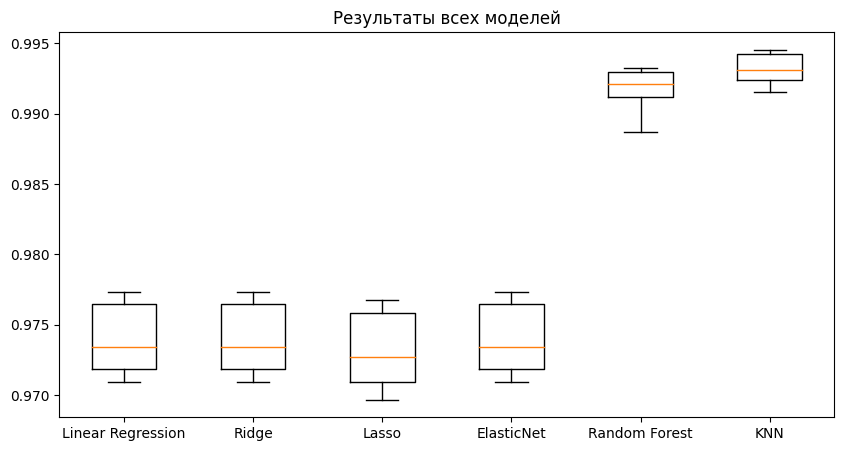

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Результаты всех моделей')
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),"Lasso": Lasso(),"ElasticNet" :ElasticNet(alpha=0.0004, l1_ratio=0.1), "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_num_std,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

Видим, что качество всех моделей достаточно высокое, но KNN дает превосходный результат.

In [ ]:
data.drop(['PM2.5 AQI Value'], axis=1, inplace=True)
X=data.drop('AQI Value',axis=1)
y=data['AQI Value']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=RANDOM_SEED)

In [ ]:
X_train_num = X_train.drop(['AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'],axis=1)
X_test_num = X_test.drop(['AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'],axis=1)

In [ ]:
sc = StandardScaler()
X_train_num_std = pd.DataFrame(sc.fit_transform(X_train_num), columns=X_train_num.columns)
X_test_num_std = pd.DataFrame(sc.transform(X_test_num), columns=X_test_num.columns)

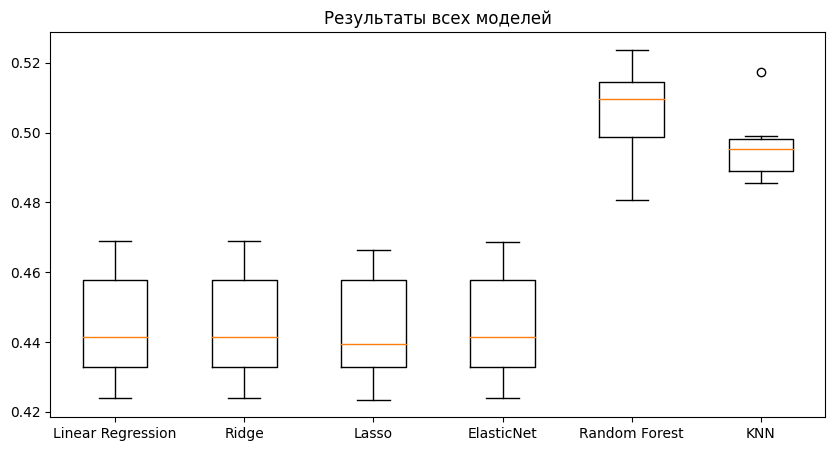

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Результаты всех моделей')
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),"Lasso": Lasso(),"ElasticNet" :ElasticNet(alpha=0.0004, l1_ratio=0.1), "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_num_std,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

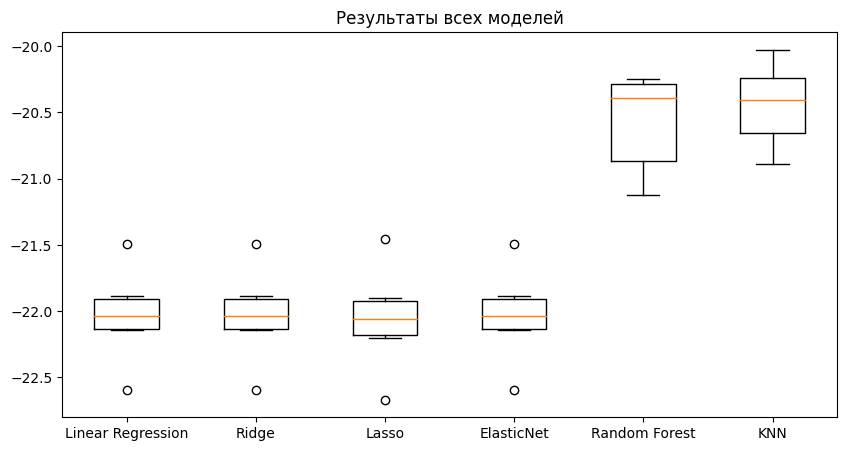

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Результаты всех моделей')
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),"Lasso": Lasso(),"ElasticNet" :ElasticNet(alpha=0.0004, l1_ratio=0.1), "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_num_std,y_train,scoring='neg_mean_absolute_error', cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

# Эксперименты с Catboost


In [3]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.4 MB/s eta 0:00:00


In [4]:
import boto3

In [5]:
S3_CONFIG ={
    "endpoint_url":"https://storage.yandexcloud.net",
    "aws_access_key_id":"*",
    "aws_secret_access_key":"*",
    "bucket":"aqi"
}

# Подключение к S3
s3_resource = boto3.resource(
        service_name="s3",
        endpoint_url=S3_CONFIG["endpoint_url"],
        aws_access_key_id=S3_CONFIG["aws_access_key_id"],
        aws_secret_access_key=S3_CONFIG["aws_secret_access_key"],
    )

obj = s3_resource.Object(bucket_name="aqi", key="cleared_data.csv")
initial_df = pd.read_csv(obj.get()['Body'])

In [6]:
X = initial_df.drop(['Country', 'City', 'AQI Value', 'AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'], axis =1)
y=initial_df['AQI Value']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=42)

In [9]:
!pip install catboost lightgbm optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.6 MB/s eta 0:00:00


In [10]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

 LightGBM с гиперпараметрами по умолчанию

In [11]:
gbm = LGBMRegressor(random_seed=42)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 15909, number of used features: 6
[LightGBM] [Info] Start training from score 68.768559


In [12]:
print(f'MSE Test: {MSE(y_test, y_pred)}')

MSE Test: 4.035275906368439


Выделим дополнительную валидационную выборку.

In [13]:
Xtrain_new, Xval, ytrain_new, yval = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [14]:
import optuna

In [15]:
def objective_lgbm(trial):

    params = {
        "verbosity": -1,
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),

    }

    model = LGBMRegressor(**params)
    model.fit(Xtrain_new, ytrain_new)
    y_prob = model.predict(Xval)
    score = MSE(yval, y_prob)
    return score

In [16]:
study = optuna.create_study(direction="minimize", study_name="LGBM tuning")
study.optimize(objective_lgbm, n_trials=50)
study.best_params

[I 2024-05-31 18:10:34,529] A new study created in memory with name: LGBM tuning
[I 2024-05-31 18:10:37,996] Trial 0 finished with value: 49.223674515098594 and parameters: {'n_estimators': 717, 'lambda_l1': 2.7663657518795582e-08, 'lambda_l2': 8.334460471930182e-07, 'num_leaves': 92, 'feature_fraction': 0.604249325689069, 'bagging_fraction': 0.42508258087802814, 'bagging_freq': 6, 'min_child_samples': 31}. Best is trial 0 with value: 49.223674515098594.
[I 2024-05-31 18:10:43,637] Trial 1 finished with value: 25.688744652203404 and parameters: {'n_estimators': 680, 'lambda_l1': 0.015508779383335898, 'lambda_l2': 8.216699395516472e-08, 'num_leaves': 193, 'feature_fraction': 0.707619926501253, 'bagging_fraction': 0.9181216590563384, 'bagging_freq': 6, 'min_child_samples': 42}. Best is trial 1 with value: 25.688744652203404.
[I 2024-05-31 18:10:45,074] Trial 2 finished with value: 60.41200346247562 and parameters: {'n_estimators': 445, 'lambda_l1': 2.2063350983657827e-06, 'lambda_l2': 8.

{'n_estimators': 385,
 'lambda_l1': 9.780379895970306,
 'lambda_l2': 0.0039330862780208985,
 'num_leaves': 153,
 'feature_fraction': 0.9364766923749135,
 'bagging_fraction': 0.6247546473581214,
 'bagging_freq': 6,
 'min_child_samples': 9}

In [19]:
model = LGBMRegressor(n_estimators=991,
                      lambda_l1=0.1628557529899325,
                      lambda_l2=0.11122471550610366,
                      num_leaves=10,
                      feature_fraction= 0.8563921794848641,
                      bagging_fraction=0.8035252735685334,
                      bagging_freq=5,
                      min_child_samples=5,
                      verbose=-1)
# model = LGBMRegressor(**study.best_params, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE Test: {MSE(y_test, y_pred)}')

MSE Test: 3.124850364654335


In [20]:
optuna.visualization.plot_optimization_history(study)

In [21]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [22]:
optuna.visualization.plot_param_importances(study)

CatBoost

In [ ]:
cb_reg_1 = CatBoostRegressor(random_seed=13, verbose=200)
cb_reg_1.fit(Xtrain_new, ytrain_new)
cb_preds = cb_reg_1.predict(Xval)

print(f'MSE Test: {MSE(yval, cb_preds)}')

Learning rate set to 0.060575
0:	learn: 45.0973308	total: 3.52ms	remaining: 3.52s
200:	learn: 1.4491265	total: 623ms	remaining: 2.48s
400:	learn: 0.8255511	total: 1.21s	remaining: 1.81s
600:	learn: 0.5920940	total: 1.82s	remaining: 1.21s
800:	learn: 0.4687295	total: 2.86s	remaining: 711ms
999:	learn: 0.3930623	total: 4.09s	remaining: 0us
MSE Test: 1.8680101560892315


In [ ]:
def objective_CatBoostRegressor(trial):

    params = {
        "learning_rate" : trial.suggest_float("learning_rate", 0.01,0.9),
        "colsample_bylevel" : trial.suggest_float("colsample_bylevel", 0.1,1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "iterations": trial.suggest_int("iterations", 500, 1000),
        "l2_leaf_reg": trial.suggest_discrete_uniform("l2_leaf_reg", 1.0, 5.0, 0.5),
        "min_child_samples": trial.suggest_categorical("min_child_samples", [1, 4, 8, 16, 32]),
        "border_count": trial.suggest_int("border_count", 30, 250),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        }


    model = CatBoostRegressor(**params)
    model.fit(Xtrain_new, ytrain_new)
    y_prob = model.predict(Xval)
    score = MSE(yval, y_prob)
    return score

In [ ]:
study = optuna.create_study(direction="minimize", study_name="CatBoostTuning tuning")
study.optimize(objective_CatBoostRegressor, n_trials=50)
study.best_params

[I 2024-05-30 20:27:03,663] A new study created in memory with name: CatBoostTuning tuning


0:	learn: 43.4521417	total: 15.6ms	remaining: 10s
1:	learn: 39.5809322	total: 96.6ms	remaining: 30.9s
2:	learn: 36.3351115	total: 139ms	remaining: 29.6s
3:	learn: 33.1546723	total: 196ms	remaining: 31.2s
4:	learn: 30.3147620	total: 257ms	remaining: 32.6s
5:	learn: 27.8198677	total: 312ms	remaining: 33s
6:	learn: 25.6073524	total: 371ms	remaining: 33.6s
7:	learn: 23.5690520	total: 442ms	remaining: 35s
8:	learn: 21.8883611	total: 469ms	remaining: 33s
9:	learn: 20.4286498	total: 532ms	remaining: 33.6s
10:	learn: 19.0239444	total: 583ms	remaining: 33.4s
11:	learn: 17.8695770	total: 650ms	remaining: 34s
12:	learn: 16.7592489	total: 713ms	remaining: 34.4s
13:	learn: 15.9220645	total: 778ms	remaining: 34.8s
14:	learn: 15.0847841	total: 788ms	remaining: 32.9s
15:	learn: 14.4130340	total: 836ms	remaining: 32.6s
16:	learn: 13.6464002	total: 881ms	remaining: 32.3s
17:	learn: 13.0946704	total: 947ms	remaining: 32.8s
18:	learn: 12.6533494	total: 996ms	remaining: 32.6s
19:	learn: 12.1443699	total: 1

[I 2024-05-30 20:27:14,809] Trial 0 finished with value: 57.116106129805075 and parameters: {'learning_rate': 0.1011130820214384, 'colsample_bylevel': 0.7080510154494402, 'depth': 10, 'boosting_type': 'Ordered', 'iterations': 641, 'l2_leaf_reg': 2.0, 'min_child_samples': 32, 'border_count': 95, 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 57.116106129805075.


630:	learn: 4.1015487	total: 10.8s	remaining: 170ms
631:	learn: 4.1015485	total: 10.8s	remaining: 153ms
632:	learn: 4.1015483	total: 10.8s	remaining: 136ms
633:	learn: 4.1015470	total: 10.8s	remaining: 119ms
634:	learn: 4.1014015	total: 10.8s	remaining: 102ms
635:	learn: 4.1008701	total: 10.8s	remaining: 84.8ms
636:	learn: 4.1008701	total: 10.8s	remaining: 67.8ms
637:	learn: 4.1000983	total: 10.8s	remaining: 50.9ms
638:	learn: 4.1000983	total: 10.8s	remaining: 33.9ms
639:	learn: 4.0998728	total: 10.9s	remaining: 17ms
640:	learn: 4.0998727	total: 10.9s	remaining: 0us
0:	learn: 41.4941534	total: 1.88ms	remaining: 1.57s
1:	learn: 36.2279688	total: 3.69ms	remaining: 1.54s
2:	learn: 31.3615139	total: 5.41ms	remaining: 1.51s
3:	learn: 27.1214140	total: 7.62ms	remaining: 1.59s
4:	learn: 23.6201877	total: 9.46ms	remaining: 1.58s
5:	learn: 20.7253552	total: 11.3ms	remaining: 1.57s
6:	learn: 18.1855641	total: 13.2ms	remaining: 1.57s
7:	learn: 16.0590811	total: 15ms	remaining: 1.56s
8:	learn: 14.

[I 2024-05-30 20:27:17,880] Trial 1 finished with value: 23.27604282078243 and parameters: {'learning_rate': 0.16806082650755508, 'colsample_bylevel': 0.7954796339021757, 'depth': 4, 'boosting_type': 'Plain', 'iterations': 839, 'l2_leaf_reg': 3.5, 'min_child_samples': 8, 'border_count': 108, 'bootstrap_type': 'Bayesian'}. Best is trial 1 with value: 23.27604282078243.


807:	learn: 1.2815378	total: 2.52s	remaining: 96.5ms
808:	learn: 1.2805825	total: 2.52s	remaining: 93.3ms
809:	learn: 1.2800349	total: 2.52s	remaining: 90.2ms
810:	learn: 1.2793061	total: 2.52s	remaining: 87ms
811:	learn: 1.2784972	total: 2.52s	remaining: 83.9ms
812:	learn: 1.2782527	total: 2.52s	remaining: 80.8ms
813:	learn: 1.2781257	total: 2.53s	remaining: 77.6ms
814:	learn: 1.2773209	total: 2.53s	remaining: 74.5ms
815:	learn: 1.2770270	total: 2.53s	remaining: 71.3ms
816:	learn: 1.2750779	total: 2.53s	remaining: 68.2ms
817:	learn: 1.2716688	total: 2.53s	remaining: 65.1ms
818:	learn: 1.2706598	total: 2.54s	remaining: 62ms
819:	learn: 1.2705520	total: 2.54s	remaining: 58.9ms
820:	learn: 1.2702811	total: 2.54s	remaining: 55.8ms
821:	learn: 1.2701614	total: 2.55s	remaining: 52.7ms
822:	learn: 1.2699788	total: 2.55s	remaining: 49.6ms
823:	learn: 1.2674541	total: 2.56s	remaining: 46.5ms
824:	learn: 1.2657529	total: 2.56s	remaining: 43.4ms
825:	learn: 1.2649921	total: 2.56s	remaining: 40.3

[I 2024-05-30 20:27:21,473] Trial 2 finished with value: 56.04839747228743 and parameters: {'learning_rate': 0.019684177013134792, 'colsample_bylevel': 0.6626339983991572, 'depth': 5, 'boosting_type': 'Ordered', 'iterations': 703, 'l2_leaf_reg': 1.0, 'min_child_samples': 32, 'border_count': 107, 'bootstrap_type': 'Bayesian'}. Best is trial 1 with value: 23.27604282078243.


0:	learn: 27.7001547	total: 3.35ms	remaining: 2.43s
1:	learn: 22.9505706	total: 5.41ms	remaining: 1.96s
2:	learn: 19.9291937	total: 7.2ms	remaining: 1.74s
3:	learn: 19.1382064	total: 8.81ms	remaining: 1.59s
4:	learn: 18.5770117	total: 11ms	remaining: 1.59s
5:	learn: 18.1616477	total: 12.9ms	remaining: 1.55s
6:	learn: 17.1687508	total: 14.8ms	remaining: 1.52s
7:	learn: 16.8466193	total: 16ms	remaining: 1.44s
8:	learn: 16.5323825	total: 17.2ms	remaining: 1.38s
9:	learn: 16.1730276	total: 18.7ms	remaining: 1.35s
10:	learn: 15.8874008	total: 20.1ms	remaining: 1.31s
11:	learn: 15.6855080	total: 21.6ms	remaining: 1.29s
12:	learn: 15.5140361	total: 22.9ms	remaining: 1.26s
13:	learn: 15.4028795	total: 24.2ms	remaining: 1.24s
14:	learn: 15.2776824	total: 25.7ms	remaining: 1.22s
15:	learn: 15.2063247	total: 27.3ms	remaining: 1.21s
16:	learn: 14.9606606	total: 28.8ms	remaining: 1.2s
17:	learn: 14.9251782	total: 30.2ms	remaining: 1.19s
18:	learn: 14.7329491	total: 31.6ms	remaining: 1.18s
19:	learn

[I 2024-05-30 20:27:22,755] Trial 3 finished with value: 138.86647198185372 and parameters: {'learning_rate': 0.8568853808459247, 'colsample_bylevel': 0.8686408981373777, 'depth': 2, 'boosting_type': 'Plain', 'iterations': 728, 'l2_leaf_reg': 4.5, 'min_child_samples': 1, 'border_count': 32, 'bootstrap_type': 'Bayesian'}. Best is trial 1 with value: 23.27604282078243.


0:	learn: 35.9595698	total: 5.83ms	remaining: 3.21s
1:	learn: 26.9825850	total: 96.2ms	remaining: 26.4s
2:	learn: 20.6161731	total: 228ms	remaining: 41.6s
3:	learn: 16.1652132	total: 346ms	remaining: 47.3s
4:	learn: 13.0524168	total: 440ms	remaining: 48.1s
5:	learn: 10.8743572	total: 520ms	remaining: 47.2s
6:	learn: 8.9394160	total: 603ms	remaining: 46.8s
7:	learn: 7.7091920	total: 708ms	remaining: 48.1s
8:	learn: 6.7631660	total: 819ms	remaining: 49.3s
9:	learn: 6.1876320	total: 895ms	remaining: 48.4s
10:	learn: 5.7502549	total: 995ms	remaining: 48.8s
11:	learn: 5.3890727	total: 1.07s	remaining: 48.3s
12:	learn: 5.1648743	total: 1.18s	remaining: 49s
13:	learn: 5.0244152	total: 1.27s	remaining: 48.8s
14:	learn: 4.9128905	total: 1.36s	remaining: 48.7s
15:	learn: 4.8914485	total: 1.37s	remaining: 45.7s
16:	learn: 4.8630671	total: 1.46s	remaining: 45.8s
17:	learn: 4.8019172	total: 1.51s	remaining: 44.8s
18:	learn: 4.6770280	total: 1.63s	remaining: 45.5s
19:	learn: 4.5686877	total: 1.75s	r

[I 2024-05-30 20:27:46,953] Trial 4 finished with value: 15.658699457938484 and parameters: {'learning_rate': 0.28806453221839556, 'colsample_bylevel': 0.7112360017376649, 'depth': 11, 'boosting_type': 'Ordered', 'iterations': 551, 'l2_leaf_reg': 3.0, 'min_child_samples': 8, 'border_count': 172, 'bootstrap_type': 'MVS'}. Best is trial 4 with value: 15.658699457938484.


549:	learn: 1.8100323	total: 23.8s	remaining: 43.3ms
550:	learn: 1.8095186	total: 23.9s	remaining: 0us
0:	learn: 28.4057402	total: 2.59ms	remaining: 2.21s
1:	learn: 19.0829484	total: 4.48ms	remaining: 1.91s
2:	learn: 16.3956809	total: 5.86ms	remaining: 1.66s
3:	learn: 13.2977962	total: 8.56ms	remaining: 1.82s
4:	learn: 11.5856589	total: 14.2ms	remaining: 2.42s
5:	learn: 10.5665824	total: 23.4ms	remaining: 3.31s
6:	learn: 9.8159984	total: 29.6ms	remaining: 3.59s
7:	learn: 9.8157280	total: 30.7ms	remaining: 3.25s
8:	learn: 9.7110510	total: 33.2ms	remaining: 3.12s
9:	learn: 9.5686201	total: 35.6ms	remaining: 3.01s
10:	learn: 9.4959925	total: 40.8ms	remaining: 3.13s
11:	learn: 9.4959881	total: 42.7ms	remaining: 3s
12:	learn: 9.2932281	total: 45.7ms	remaining: 2.96s
13:	learn: 8.8763078	total: 50.2ms	remaining: 3.02s
14:	learn: 8.7193077	total: 53.2ms	remaining: 2.98s
15:	learn: 8.5898738	total: 55.9ms	remaining: 2.93s
16:	learn: 8.2721900	total: 58.9ms	remaining: 2.9s
17:	learn: 7.9310706	

[I 2024-05-30 20:27:49,234] Trial 5 finished with value: 64.67527391138607 and parameters: {'learning_rate': 0.5141070838161546, 'colsample_bylevel': 0.3138491555557076, 'depth': 7, 'boosting_type': 'Plain', 'iterations': 855, 'l2_leaf_reg': 3.5, 'min_child_samples': 1, 'border_count': 94, 'bootstrap_type': 'MVS'}. Best is trial 4 with value: 15.658699457938484.


801:	learn: 1.8211379	total: 1.9s	remaining: 126ms
802:	learn: 1.8211356	total: 1.91s	remaining: 123ms
803:	learn: 1.8198042	total: 1.91s	remaining: 121ms
804:	learn: 1.8197981	total: 1.91s	remaining: 119ms
805:	learn: 1.8183604	total: 1.91s	remaining: 116ms
806:	learn: 1.8179675	total: 1.92s	remaining: 114ms
807:	learn: 1.8177044	total: 1.92s	remaining: 112ms
808:	learn: 1.8175013	total: 1.92s	remaining: 109ms
809:	learn: 1.8170727	total: 1.93s	remaining: 107ms
810:	learn: 1.8166464	total: 1.93s	remaining: 105ms
811:	learn: 1.8165813	total: 1.93s	remaining: 102ms
812:	learn: 1.8165774	total: 1.93s	remaining: 99.9ms
813:	learn: 1.8160178	total: 1.94s	remaining: 97.6ms
814:	learn: 1.8160124	total: 1.94s	remaining: 95.2ms
815:	learn: 1.8160088	total: 1.94s	remaining: 92.7ms
816:	learn: 1.8157927	total: 1.94s	remaining: 90.4ms
817:	learn: 1.8151642	total: 1.95s	remaining: 88ms
818:	learn: 1.8151419	total: 1.95s	remaining: 85.6ms
819:	learn: 1.8146623	total: 1.95s	remaining: 83.2ms
820:	le

[I 2024-05-30 20:27:50,188] Trial 6 finished with value: 76.1397654209003 and parameters: {'learning_rate': 0.5377731082106101, 'colsample_bylevel': 0.12276910730680812, 'depth': 2, 'boosting_type': 'Ordered', 'iterations': 500, 'l2_leaf_reg': 2.0, 'min_child_samples': 1, 'border_count': 85, 'bootstrap_type': 'Bernoulli'}. Best is trial 4 with value: 15.658699457938484.


461:	learn: 9.4081449	total: 755ms	remaining: 62.1ms
462:	learn: 9.4081401	total: 757ms	remaining: 60.5ms
463:	learn: 9.4081401	total: 761ms	remaining: 59.1ms
464:	learn: 9.4081401	total: 763ms	remaining: 57.4ms
465:	learn: 9.4027075	total: 766ms	remaining: 55.9ms
466:	learn: 9.4027075	total: 768ms	remaining: 54.3ms
467:	learn: 9.4027075	total: 770ms	remaining: 52.6ms
468:	learn: 9.4022944	total: 771ms	remaining: 51ms
469:	learn: 9.4022944	total: 773ms	remaining: 49.3ms
470:	learn: 9.4019004	total: 774ms	remaining: 47.7ms
471:	learn: 9.3849902	total: 776ms	remaining: 46ms
472:	learn: 9.3849902	total: 777ms	remaining: 44.4ms
473:	learn: 9.3849902	total: 779ms	remaining: 42.7ms
474:	learn: 9.3849902	total: 780ms	remaining: 41.1ms
475:	learn: 9.3844081	total: 782ms	remaining: 39.4ms
476:	learn: 9.3815331	total: 784ms	remaining: 37.8ms
477:	learn: 9.3815331	total: 785ms	remaining: 36.1ms
478:	learn: 9.3815331	total: 786ms	remaining: 34.5ms
479:	learn: 9.3815331	total: 788ms	remaining: 32.8

[I 2024-05-30 20:27:52,259] Trial 7 finished with value: 39.25376355361338 and parameters: {'learning_rate': 0.7878616303226903, 'colsample_bylevel': 0.7503520150624566, 'depth': 1, 'boosting_type': 'Ordered', 'iterations': 775, 'l2_leaf_reg': 2.0, 'min_child_samples': 16, 'border_count': 192, 'bootstrap_type': 'MVS'}. Best is trial 4 with value: 15.658699457938484.


753:	learn: 6.2899654	total: 1.8s	remaining: 50.1ms
754:	learn: 6.2899145	total: 1.8s	remaining: 47.7ms
755:	learn: 6.2899145	total: 1.81s	remaining: 45.4ms
756:	learn: 6.2899144	total: 1.81s	remaining: 43ms
757:	learn: 6.2899144	total: 1.81s	remaining: 40.6ms
758:	learn: 6.2897990	total: 1.81s	remaining: 38.2ms
759:	learn: 6.2897899	total: 1.81s	remaining: 35.8ms
760:	learn: 6.2893013	total: 1.82s	remaining: 33.4ms
761:	learn: 6.2879190	total: 1.82s	remaining: 31ms
762:	learn: 6.2872644	total: 1.82s	remaining: 28.6ms
763:	learn: 6.2866152	total: 1.82s	remaining: 26.2ms
764:	learn: 6.2855972	total: 1.82s	remaining: 23.9ms
765:	learn: 6.2851646	total: 1.83s	remaining: 21.5ms
766:	learn: 6.2851575	total: 1.83s	remaining: 19.1ms
767:	learn: 6.2850949	total: 1.83s	remaining: 16.7ms
768:	learn: 6.2849871	total: 1.83s	remaining: 14.3ms
769:	learn: 6.2849871	total: 1.84s	remaining: 11.9ms
770:	learn: 6.2849871	total: 1.84s	remaining: 9.54ms
771:	learn: 6.2849631	total: 1.84s	remaining: 7.15ms

[I 2024-05-30 20:27:54,474] Trial 8 finished with value: 121.49290144896727 and parameters: {'learning_rate': 0.1774204944327197, 'colsample_bylevel': 0.23464773071871686, 'depth': 6, 'boosting_type': 'Ordered', 'iterations': 854, 'l2_leaf_reg': 1.5, 'min_child_samples': 8, 'border_count': 44, 'bootstrap_type': 'Bernoulli'}. Best is trial 4 with value: 15.658699457938484.


0:	learn: 26.5261195	total: 2.79ms	remaining: 2.62s
1:	learn: 16.1016350	total: 6.18ms	remaining: 2.9s
2:	learn: 14.4474351	total: 8.79ms	remaining: 2.75s
3:	learn: 12.8448183	total: 11.7ms	remaining: 2.74s
4:	learn: 11.2591406	total: 14.3ms	remaining: 2.69s
5:	learn: 10.3148046	total: 17.1ms	remaining: 2.67s
6:	learn: 9.2720346	total: 20.1ms	remaining: 2.67s
7:	learn: 8.9769851	total: 22.6ms	remaining: 2.64s
8:	learn: 8.8793242	total: 25.7ms	remaining: 2.66s
9:	learn: 8.5008346	total: 28.4ms	remaining: 2.64s
10:	learn: 8.1693137	total: 31.3ms	remaining: 2.65s
11:	learn: 7.9639999	total: 34.2ms	remaining: 2.64s
12:	learn: 7.5636832	total: 37ms	remaining: 2.64s
13:	learn: 7.1461438	total: 39.9ms	remaining: 2.64s
14:	learn: 7.1460248	total: 42.1ms	remaining: 2.6s
15:	learn: 6.6821113	total: 45ms	remaining: 2.6s
16:	learn: 6.6652419	total: 47.7ms	remaining: 2.59s
17:	learn: 6.1524883	total: 50.4ms	remaining: 2.58s
18:	learn: 6.0521311	total: 53.3ms	remaining: 2.58s
19:	learn: 5.9265792	to

[I 2024-05-30 20:27:59,626] Trial 9 finished with value: 11.349255825516735 and parameters: {'learning_rate': 0.7728084260073517, 'colsample_bylevel': 0.7021088139086598, 'depth': 3, 'boosting_type': 'Ordered', 'iterations': 941, 'l2_leaf_reg': 2.0, 'min_child_samples': 32, 'border_count': 226, 'bootstrap_type': 'Bayesian'}. Best is trial 9 with value: 11.349255825516735.


919:	learn: 2.1935349	total: 4.54s	remaining: 104ms
920:	learn: 2.1935338	total: 4.54s	remaining: 98.6ms
921:	learn: 2.1934871	total: 4.54s	remaining: 93.7ms
922:	learn: 2.1934864	total: 4.55s	remaining: 88.7ms
923:	learn: 2.1934862	total: 4.55s	remaining: 83.7ms
924:	learn: 2.1934455	total: 4.55s	remaining: 78.8ms
925:	learn: 2.1934146	total: 4.56s	remaining: 73.8ms
926:	learn: 2.1933618	total: 4.56s	remaining: 68.9ms
927:	learn: 2.1933614	total: 4.56s	remaining: 63.9ms
928:	learn: 2.1933451	total: 4.57s	remaining: 59ms
929:	learn: 2.1932855	total: 4.57s	remaining: 54ms
930:	learn: 2.1932851	total: 4.57s	remaining: 49.1ms
931:	learn: 2.1932850	total: 4.57s	remaining: 44.2ms
932:	learn: 2.1932839	total: 4.58s	remaining: 39.2ms
933:	learn: 2.1932666	total: 4.58s	remaining: 34.3ms
934:	learn: 2.1932436	total: 4.58s	remaining: 29.4ms
935:	learn: 2.1927976	total: 4.58s	remaining: 24.5ms
936:	learn: 2.1927599	total: 4.59s	remaining: 19.6ms
937:	learn: 2.1921259	total: 4.59s	remaining: 14.7m

[I 2024-05-30 20:28:06,090] Trial 10 finished with value: 6.120451747588839 and parameters: {'learning_rate': 0.6541446662939354, 'colsample_bylevel': 0.9918782235025569, 'depth': 8, 'boosting_type': 'Plain', 'iterations': 969, 'l2_leaf_reg': 5.0, 'min_child_samples': 4, 'border_count': 248, 'bootstrap_type': 'Bayesian'}. Best is trial 10 with value: 6.120451747588839.


0:	learn: 20.7874208	total: 5.31ms	remaining: 5.31s
1:	learn: 11.0823919	total: 11ms	remaining: 5.47s
2:	learn: 7.6983084	total: 16.9ms	remaining: 5.6s
3:	learn: 6.1425366	total: 23.2ms	remaining: 5.77s
4:	learn: 5.3347301	total: 29.1ms	remaining: 5.79s
5:	learn: 4.6475930	total: 35.3ms	remaining: 5.86s
6:	learn: 4.3230044	total: 40.9ms	remaining: 5.8s
7:	learn: 4.1281297	total: 46.2ms	remaining: 5.72s
8:	learn: 3.9043097	total: 51.9ms	remaining: 5.72s
9:	learn: 3.6972017	total: 58.4ms	remaining: 5.78s
10:	learn: 3.4603721	total: 63.9ms	remaining: 5.75s
11:	learn: 3.3218113	total: 69.8ms	remaining: 5.75s
12:	learn: 3.2661394	total: 75ms	remaining: 5.69s
13:	learn: 3.1821234	total: 80.3ms	remaining: 5.66s
14:	learn: 2.9780894	total: 86ms	remaining: 5.65s
15:	learn: 2.7963172	total: 91.7ms	remaining: 5.64s
16:	learn: 2.6694803	total: 99.2ms	remaining: 5.73s
17:	learn: 2.5799495	total: 105ms	remaining: 5.75s
18:	learn: 2.5138076	total: 110ms	remaining: 5.7s
19:	learn: 2.4830725	total: 115

[I 2024-05-30 20:28:14,677] Trial 11 finished with value: 9.252239267326294 and parameters: {'learning_rate': 0.6838408921169682, 'colsample_bylevel': 0.958775759932585, 'depth': 8, 'boosting_type': 'Plain', 'iterations': 1000, 'l2_leaf_reg': 5.0, 'min_child_samples': 4, 'border_count': 249, 'bootstrap_type': 'Bayesian'}. Best is trial 10 with value: 6.120451747588839.


0:	learn: 21.5672080	total: 5.77ms	remaining: 5.69s
1:	learn: 11.2184939	total: 11.3ms	remaining: 5.57s
2:	learn: 7.4595221	total: 17.5ms	remaining: 5.75s
3:	learn: 5.9809636	total: 23ms	remaining: 5.65s
4:	learn: 5.4216518	total: 28.9ms	remaining: 5.67s
5:	learn: 4.9664275	total: 34.4ms	remaining: 5.62s
6:	learn: 4.7278436	total: 39.6ms	remaining: 5.54s
7:	learn: 4.4394915	total: 46.9ms	remaining: 5.74s
8:	learn: 4.3440152	total: 55ms	remaining: 5.97s
9:	learn: 4.2423360	total: 60.5ms	remaining: 5.91s
10:	learn: 3.8396487	total: 66ms	remaining: 5.85s
11:	learn: 3.5198227	total: 71.7ms	remaining: 5.82s
12:	learn: 3.3952963	total: 76.9ms	remaining: 5.76s
13:	learn: 3.3102728	total: 82.3ms	remaining: 5.71s
14:	learn: 3.2042431	total: 87.7ms	remaining: 5.68s
15:	learn: 3.0796036	total: 92.8ms	remaining: 5.63s
16:	learn: 2.8953175	total: 98.4ms	remaining: 5.61s
17:	learn: 2.8327786	total: 104ms	remaining: 5.58s
18:	learn: 2.7759864	total: 109ms	remaining: 5.54s
19:	learn: 2.6765074	total: 

[I 2024-05-30 20:28:21,165] Trial 12 finished with value: 5.509354690154825 and parameters: {'learning_rate': 0.6663002047791218, 'colsample_bylevel': 0.9935715302350125, 'depth': 8, 'boosting_type': 'Plain', 'iterations': 986, 'l2_leaf_reg': 5.0, 'min_child_samples': 4, 'border_count': 238, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


973:	learn: 0.0822086	total: 5.99s	remaining: 73.8ms
974:	learn: 0.0821758	total: 6s	remaining: 67.7ms
975:	learn: 0.0821100	total: 6.01s	remaining: 61.6ms
976:	learn: 0.0820072	total: 6.01s	remaining: 55.4ms
977:	learn: 0.0819761	total: 6.02s	remaining: 49.2ms
978:	learn: 0.0819000	total: 6.02s	remaining: 43.1ms
979:	learn: 0.0818484	total: 6.03s	remaining: 36.9ms
980:	learn: 0.0817365	total: 6.04s	remaining: 30.8ms
981:	learn: 0.0816626	total: 6.04s	remaining: 24.6ms
982:	learn: 0.0815787	total: 6.05s	remaining: 18.5ms
983:	learn: 0.0815176	total: 6.05s	remaining: 12.3ms
984:	learn: 0.0813738	total: 6.06s	remaining: 6.15ms
985:	learn: 0.0813013	total: 6.06s	remaining: 0us
0:	learn: 22.4592055	total: 19.3ms	remaining: 19.2s
1:	learn: 12.0458616	total: 30.4ms	remaining: 15.1s
2:	learn: 7.8218996	total: 40.2ms	remaining: 13.3s
3:	learn: 6.1568438	total: 48.2ms	remaining: 11.9s
4:	learn: 5.3224167	total: 56.8ms	remaining: 11.2s
5:	learn: 4.7696856	total: 64.5ms	remaining: 10.6s
6:	learn:

[I 2024-05-30 20:28:32,668] Trial 13 finished with value: 6.63955057057651 and parameters: {'learning_rate': 0.619907253902054, 'colsample_bylevel': 0.9821548046681692, 'depth': 9, 'boosting_type': 'Plain', 'iterations': 995, 'l2_leaf_reg': 5.0, 'min_child_samples': 4, 'border_count': 205, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


984:	learn: 0.0692826	total: 10.8s	remaining: 110ms
985:	learn: 0.0692166	total: 10.9s	remaining: 99ms
986:	learn: 0.0691120	total: 10.9s	remaining: 88ms
987:	learn: 0.0690383	total: 10.9s	remaining: 77ms
988:	learn: 0.0690101	total: 10.9s	remaining: 66ms
989:	learn: 0.0689208	total: 10.9s	remaining: 55ms
990:	learn: 0.0688770	total: 10.9s	remaining: 44ms
991:	learn: 0.0688050	total: 10.9s	remaining: 33ms
992:	learn: 0.0686970	total: 10.9s	remaining: 22ms
993:	learn: 0.0686328	total: 10.9s	remaining: 11ms
994:	learn: 0.0685232	total: 10.9s	remaining: 0us
0:	learn: 32.0547857	total: 33ms	remaining: 30.6s
1:	learn: 22.5754930	total: 84.5ms	remaining: 39.1s
2:	learn: 15.6441505	total: 118ms	remaining: 36.5s
3:	learn: 11.5040949	total: 132ms	remaining: 30.5s
4:	learn: 8.7194372	total: 163ms	remaining: 30.1s
5:	learn: 7.1825687	total: 189ms	remaining: 29s
6:	learn: 6.2533546	total: 220ms	remaining: 28.9s
7:	learn: 5.5407492	total: 264ms	remaining: 30.4s
8:	learn: 5.0065015	total: 292ms	rema

[I 2024-05-30 20:29:05,233] Trial 14 finished with value: 40.132785118525845 and parameters: {'learning_rate': 0.38964915557549906, 'colsample_bylevel': 0.5094199322257522, 'depth': 12, 'boosting_type': 'Plain', 'iterations': 927, 'l2_leaf_reg': 4.0, 'min_child_samples': 4, 'border_count': 246, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


0:	learn: 26.0879357	total: 4.79ms	remaining: 4.42s
1:	learn: 15.7169348	total: 8.6ms	remaining: 3.96s
2:	learn: 13.0235174	total: 9.73ms	remaining: 2.98s
3:	learn: 9.9773520	total: 14.3ms	remaining: 3.27s
4:	learn: 8.4178061	total: 18.3ms	remaining: 3.35s
5:	learn: 8.1313870	total: 19ms	remaining: 2.9s
6:	learn: 7.5811200	total: 22.9ms	remaining: 2.99s
7:	learn: 7.2890097	total: 27.2ms	remaining: 3.12s
8:	learn: 7.1566792	total: 28.9ms	remaining: 2.94s
9:	learn: 6.8032740	total: 32.6ms	remaining: 2.98s
10:	learn: 6.1445348	total: 36.2ms	remaining: 3s
11:	learn: 5.8416196	total: 40.1ms	remaining: 3.04s
12:	learn: 5.4131424	total: 45ms	remaining: 3.15s
13:	learn: 5.3052584	total: 48.7ms	remaining: 3.16s
14:	learn: 5.0840600	total: 52.9ms	remaining: 3.21s
15:	learn: 4.8087366	total: 60.5ms	remaining: 3.43s
16:	learn: 4.6736412	total: 69.5ms	remaining: 3.7s
17:	learn: 4.5061499	total: 79.7ms	remaining: 4.01s
18:	learn: 4.3841435	total: 85.4ms	remaining: 4.06s
19:	learn: 4.1090223	total: 9

[I 2024-05-30 20:29:10,645] Trial 15 finished with value: 16.390386378230804 and parameters: {'learning_rate': 0.651172738620313, 'colsample_bylevel': 0.5035037966956144, 'depth': 8, 'boosting_type': 'Plain', 'iterations': 923, 'l2_leaf_reg': 4.5, 'min_child_samples': 4, 'border_count': 159, 'bootstrap_type': 'Bernoulli'}. Best is trial 12 with value: 5.509354690154825.


917:	learn: 0.1934088	total: 4.77s	remaining: 26ms
918:	learn: 0.1931967	total: 4.79s	remaining: 20.8ms
919:	learn: 0.1925521	total: 4.79s	remaining: 15.6ms
920:	learn: 0.1924550	total: 4.79s	remaining: 10.4ms
921:	learn: 0.1923199	total: 4.8s	remaining: 5.2ms
922:	learn: 0.1919683	total: 4.8s	remaining: 0us
0:	learn: 31.9068330	total: 3.13ms	remaining: 2.47s
1:	learn: 21.7847224	total: 6.47ms	remaining: 2.55s
2:	learn: 15.4854308	total: 9.32ms	remaining: 2.44s
3:	learn: 11.6530465	total: 12.2ms	remaining: 2.4s
4:	learn: 9.3299873	total: 15.1ms	remaining: 2.37s
5:	learn: 7.8705806	total: 18.1ms	remaining: 2.37s
6:	learn: 6.8505411	total: 21.3ms	remaining: 2.38s
7:	learn: 6.3490361	total: 23.8ms	remaining: 2.33s
8:	learn: 5.8288847	total: 27ms	remaining: 2.34s
9:	learn: 5.5634082	total: 34.4ms	remaining: 2.68s
10:	learn: 5.2578546	total: 38.6ms	remaining: 2.73s
11:	learn: 4.9536707	total: 44.2ms	remaining: 2.86s
12:	learn: 4.8165340	total: 47.2ms	remaining: 2.82s
13:	learn: 4.6132992	to

[I 2024-05-30 20:29:13,689] Trial 16 finished with value: 7.549572391474971 and parameters: {'learning_rate': 0.4051868120682612, 'colsample_bylevel': 0.8726213591672218, 'depth': 6, 'boosting_type': 'Plain', 'iterations': 790, 'l2_leaf_reg': 4.5, 'min_child_samples': 4, 'border_count': 206, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


744:	learn: 0.2900273	total: 2.52s	remaining: 152ms
745:	learn: 0.2898911	total: 2.53s	remaining: 149ms
746:	learn: 0.2897898	total: 2.53s	remaining: 146ms
747:	learn: 0.2896758	total: 2.54s	remaining: 142ms
748:	learn: 0.2888894	total: 2.54s	remaining: 139ms
749:	learn: 0.2885041	total: 2.54s	remaining: 136ms
750:	learn: 0.2883143	total: 2.55s	remaining: 132ms
751:	learn: 0.2879910	total: 2.55s	remaining: 129ms
752:	learn: 0.2876107	total: 2.56s	remaining: 126ms
753:	learn: 0.2862885	total: 2.56s	remaining: 122ms
754:	learn: 0.2859465	total: 2.56s	remaining: 119ms
755:	learn: 0.2857649	total: 2.57s	remaining: 115ms
756:	learn: 0.2856499	total: 2.57s	remaining: 112ms
757:	learn: 0.2855572	total: 2.57s	remaining: 109ms
758:	learn: 0.2850085	total: 2.58s	remaining: 105ms
759:	learn: 0.2849573	total: 2.58s	remaining: 102ms
760:	learn: 0.2836599	total: 2.58s	remaining: 98.4ms
761:	learn: 0.2834004	total: 2.58s	remaining: 95ms
762:	learn: 0.2832146	total: 2.59s	remaining: 91.6ms
763:	learn:

[I 2024-05-30 20:29:23,440] Trial 17 finished with value: 22.04152474951845 and parameters: {'learning_rate': 0.574294327004451, 'colsample_bylevel': 0.9989014636673791, 'depth': 9, 'boosting_type': 'Plain', 'iterations': 895, 'l2_leaf_reg': 3.0, 'min_child_samples': 16, 'border_count': 138, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


0:	learn: 16.3741569	total: 3.81ms	remaining: 3.69s
1:	learn: 10.3506523	total: 8.28ms	remaining: 4s
2:	learn: 8.2435119	total: 12.8ms	remaining: 4.11s
3:	learn: 7.1875865	total: 16.3ms	remaining: 3.94s
4:	learn: 6.5973956	total: 20.4ms	remaining: 3.93s
5:	learn: 5.7618841	total: 24.4ms	remaining: 3.91s
6:	learn: 5.4406996	total: 28ms	remaining: 3.85s
7:	learn: 5.1836011	total: 32.6ms	remaining: 3.91s
8:	learn: 4.8941121	total: 36.2ms	remaining: 3.86s
9:	learn: 4.7408677	total: 39.7ms	remaining: 3.81s
10:	learn: 4.7408677	total: 41ms	remaining: 3.57s
11:	learn: 4.2339600	total: 45.8ms	remaining: 3.65s
12:	learn: 4.1121719	total: 48.5ms	remaining: 3.57s
13:	learn: 3.9552684	total: 53.5ms	remaining: 3.65s
14:	learn: 3.8230286	total: 58.2ms	remaining: 3.7s
15:	learn: 3.6015862	total: 62.4ms	remaining: 3.72s
16:	learn: 3.4447111	total: 65.6ms	remaining: 3.67s
17:	learn: 3.2967340	total: 69ms	remaining: 3.64s
18:	learn: 3.2909088	total: 70.7ms	remaining: 3.53s
19:	learn: 3.2860226	total: 75

[I 2024-05-30 20:29:27,766] Trial 18 finished with value: 19.66388569330437 and parameters: {'learning_rate': 0.8975596470289389, 'colsample_bylevel': 0.5833833276209448, 'depth': 7, 'boosting_type': 'Plain', 'iterations': 969, 'l2_leaf_reg': 5.0, 'min_child_samples': 4, 'border_count': 233, 'bootstrap_type': 'MVS'}. Best is trial 12 with value: 5.509354690154825.


958:	learn: 0.1199123	total: 3.86s	remaining: 40.3ms
959:	learn: 0.1198211	total: 3.87s	remaining: 36.3ms
960:	learn: 0.1197117	total: 3.88s	remaining: 32.3ms
961:	learn: 0.1195892	total: 3.88s	remaining: 28.3ms
962:	learn: 0.1195604	total: 3.89s	remaining: 24.2ms
963:	learn: 0.1192693	total: 3.89s	remaining: 20.2ms
964:	learn: 0.1190036	total: 3.9s	remaining: 16.1ms
965:	learn: 0.1189268	total: 3.9s	remaining: 12.1ms
966:	learn: 0.1188773	total: 3.9s	remaining: 8.07ms
967:	learn: 0.1186356	total: 3.91s	remaining: 4.04ms
968:	learn: 0.1184963	total: 3.91s	remaining: 0us
0:	learn: 21.1326000	total: 13ms	remaining: 8.41s
1:	learn: 11.1198795	total: 25.1ms	remaining: 8.11s
2:	learn: 7.9505055	total: 42.9ms	remaining: 9.23s
3:	learn: 6.4806377	total: 61.4ms	remaining: 9.9s
4:	learn: 6.0147025	total: 74ms	remaining: 9.54s
5:	learn: 5.3479641	total: 87.6ms	remaining: 9.39s
6:	learn: 5.0990712	total: 101ms	remaining: 9.25s
7:	learn: 4.6739646	total: 114ms	remaining: 9.14s
8:	learn: 4.5591675	

[I 2024-05-30 20:29:39,068] Trial 19 finished with value: 18.656495248348595 and parameters: {'learning_rate': 0.716011414451728, 'colsample_bylevel': 0.8734614827671917, 'depth': 10, 'boosting_type': 'Plain', 'iterations': 649, 'l2_leaf_reg': 4.0, 'min_child_samples': 4, 'border_count': 218, 'bootstrap_type': 'Bernoulli'}. Best is trial 12 with value: 5.509354690154825.


0:	learn: 37.5260625	total: 1.3ms	remaining: 1.16s
1:	learn: 29.2451361	total: 4.38ms	remaining: 1.94s
2:	learn: 23.4569071	total: 7.02ms	remaining: 2.07s
3:	learn: 18.7541933	total: 9.15ms	remaining: 2.02s
4:	learn: 14.8419324	total: 11.6ms	remaining: 2.05s
5:	learn: 12.7408664	total: 13.1ms	remaining: 1.93s
6:	learn: 11.8183751	total: 14.5ms	remaining: 1.83s
7:	learn: 10.4167821	total: 16.6ms	remaining: 1.82s
8:	learn: 9.7093544	total: 18.6ms	remaining: 1.82s
9:	learn: 9.0018454	total: 21.9ms	remaining: 1.92s
10:	learn: 8.3011799	total: 23.8ms	remaining: 1.9s
11:	learn: 7.8576740	total: 25.9ms	remaining: 1.89s
12:	learn: 7.8295432	total: 27.2ms	remaining: 1.83s
13:	learn: 7.4196131	total: 29.3ms	remaining: 1.83s
14:	learn: 7.2132809	total: 32.2ms	remaining: 1.88s
15:	learn: 6.9794421	total: 35.2ms	remaining: 1.92s
16:	learn: 6.9072558	total: 39.5ms	remaining: 2.02s
17:	learn: 6.7358056	total: 43.2ms	remaining: 2.08s
18:	learn: 6.5513688	total: 45ms	remaining: 2.06s
19:	learn: 6.15606

[I 2024-05-30 20:29:41,392] Trial 20 finished with value: 5.784973670640818 and parameters: {'learning_rate': 0.3278383606211134, 'colsample_bylevel': 0.39448144459341383, 'depth': 5, 'boosting_type': 'Plain', 'iterations': 888, 'l2_leaf_reg': 4.0, 'min_child_samples': 4, 'border_count': 179, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


843:	learn: 0.6966051	total: 1.91s	remaining: 99.3ms
844:	learn: 0.6958377	total: 1.91s	remaining: 97.1ms
845:	learn: 0.6958367	total: 1.91s	remaining: 95ms
846:	learn: 0.6957702	total: 1.92s	remaining: 92.8ms
847:	learn: 0.6956306	total: 1.92s	remaining: 90.6ms
848:	learn: 0.6953488	total: 1.93s	remaining: 88.5ms
849:	learn: 0.6941512	total: 1.93s	remaining: 86.2ms
850:	learn: 0.6939179	total: 1.93s	remaining: 83.9ms
851:	learn: 0.6935295	total: 1.93s	remaining: 81.6ms
852:	learn: 0.6933946	total: 1.93s	remaining: 79.4ms
853:	learn: 0.6914707	total: 1.94s	remaining: 77.1ms
854:	learn: 0.6910279	total: 1.94s	remaining: 74.8ms
855:	learn: 0.6894871	total: 1.94s	remaining: 72.6ms
856:	learn: 0.6890417	total: 1.94s	remaining: 70.3ms
857:	learn: 0.6888469	total: 1.95s	remaining: 68ms
858:	learn: 0.6882143	total: 1.95s	remaining: 65.8ms
859:	learn: 0.6879148	total: 1.95s	remaining: 63.5ms
860:	learn: 0.6875887	total: 1.95s	remaining: 61.2ms
861:	learn: 0.6875819	total: 1.95s	remaining: 58.9

[I 2024-05-30 20:29:44,883] Trial 21 finished with value: 6.061813288451662 and parameters: {'learning_rate': 0.3017881348517921, 'colsample_bylevel': 0.39811086228058856, 'depth': 5, 'boosting_type': 'Plain', 'iterations': 892, 'l2_leaf_reg': 4.0, 'min_child_samples': 4, 'border_count': 179, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


876:	learn: 0.7375556	total: 2.85s	remaining: 48.8ms
877:	learn: 0.7370006	total: 2.86s	remaining: 45.6ms
878:	learn: 0.7370005	total: 2.86s	remaining: 42.3ms
879:	learn: 0.7363504	total: 2.87s	remaining: 39.1ms
880:	learn: 0.7360319	total: 2.87s	remaining: 35.8ms
881:	learn: 0.7358313	total: 2.88s	remaining: 32.6ms
882:	learn: 0.7355811	total: 2.88s	remaining: 29.4ms
883:	learn: 0.7347642	total: 2.89s	remaining: 26.1ms
884:	learn: 0.7342911	total: 2.89s	remaining: 22.9ms
885:	learn: 0.7340452	total: 2.9s	remaining: 19.6ms
886:	learn: 0.7338655	total: 2.9s	remaining: 16.4ms
887:	learn: 0.7338654	total: 2.9s	remaining: 13.1ms
888:	learn: 0.7329073	total: 2.91s	remaining: 9.81ms
889:	learn: 0.7324233	total: 2.91s	remaining: 6.54ms
890:	learn: 0.7322093	total: 2.91s	remaining: 3.27ms
891:	learn: 0.7307825	total: 2.92s	remaining: 0us
0:	learn: 38.3652794	total: 2.96ms	remaining: 2.61s
1:	learn: 30.4677336	total: 7.16ms	remaining: 3.16s
2:	learn: 24.7143988	total: 11.8ms	remaining: 3.46s
3:

[I 2024-05-30 20:29:49,026] Trial 22 finished with value: 8.560389860588153 and parameters: {'learning_rate': 0.2981989725348053, 'colsample_bylevel': 0.39011387082644616, 'depth': 5, 'boosting_type': 'Plain', 'iterations': 885, 'l2_leaf_reg': 4.0, 'min_child_samples': 4, 'border_count': 175, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


879:	learn: 0.7522741	total: 3.27s	remaining: 18.6ms
880:	learn: 0.7519050	total: 3.27s	remaining: 14.9ms
881:	learn: 0.7518659	total: 3.27s	remaining: 11.1ms
882:	learn: 0.7497389	total: 3.28s	remaining: 7.43ms
883:	learn: 0.7494884	total: 3.28s	remaining: 3.71ms
884:	learn: 0.7487125	total: 3.29s	remaining: 0us
0:	learn: 38.0423847	total: 2.04ms	remaining: 1.7s
1:	learn: 29.7207351	total: 5.69ms	remaining: 2.37s
2:	learn: 23.4624123	total: 10.8ms	remaining: 2.99s
3:	learn: 20.0133685	total: 22.6ms	remaining: 4.71s
4:	learn: 16.0115940	total: 25.7ms	remaining: 4.28s
5:	learn: 13.6826545	total: 31.3ms	remaining: 4.34s
6:	learn: 11.9591830	total: 33.3ms	remaining: 3.95s
7:	learn: 10.9311477	total: 37.3ms	remaining: 3.87s
8:	learn: 10.1096302	total: 39.5ms	remaining: 3.64s
9:	learn: 9.8105556	total: 44.1ms	remaining: 3.64s
10:	learn: 9.3686804	total: 47.9ms	remaining: 3.6s
11:	learn: 9.0048335	total: 50ms	remaining: 3.44s
12:	learn: 8.7699975	total: 54ms	remaining: 3.42s
13:	learn: 8.445

[I 2024-05-30 20:29:51,765] Trial 23 finished with value: 24.572830401817555 and parameters: {'learning_rate': 0.30865634052017, 'colsample_bylevel': 0.4089525887486536, 'depth': 4, 'boosting_type': 'Plain', 'iterations': 837, 'l2_leaf_reg': 3.5, 'min_child_samples': 4, 'border_count': 135, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


792:	learn: 1.2571701	total: 2.14s	remaining: 119ms
793:	learn: 1.2562675	total: 2.14s	remaining: 116ms
794:	learn: 1.2560131	total: 2.15s	remaining: 114ms
795:	learn: 1.2555505	total: 2.15s	remaining: 111ms
796:	learn: 1.2550656	total: 2.16s	remaining: 108ms
797:	learn: 1.2523619	total: 2.16s	remaining: 106ms
798:	learn: 1.2523532	total: 2.16s	remaining: 103ms
799:	learn: 1.2516825	total: 2.16s	remaining: 100ms
800:	learn: 1.2514577	total: 2.17s	remaining: 97.3ms
801:	learn: 1.2500656	total: 2.17s	remaining: 94.6ms
802:	learn: 1.2462937	total: 2.17s	remaining: 91.8ms
803:	learn: 1.2439082	total: 2.17s	remaining: 89.1ms
804:	learn: 1.2432463	total: 2.17s	remaining: 86.4ms
805:	learn: 1.2429128	total: 2.17s	remaining: 83.6ms
806:	learn: 1.2427150	total: 2.18s	remaining: 80.9ms
807:	learn: 1.2427082	total: 2.18s	remaining: 78.2ms
808:	learn: 1.2414881	total: 2.18s	remaining: 75.4ms
809:	learn: 1.2412584	total: 2.18s	remaining: 72.7ms
810:	learn: 1.2412311	total: 2.18s	remaining: 70ms
811

[I 2024-05-30 20:29:53,840] Trial 24 finished with value: 8.801159313355706 and parameters: {'learning_rate': 0.46413465212781846, 'colsample_bylevel': 0.41515977262116066, 'depth': 5, 'boosting_type': 'Plain', 'iterations': 808, 'l2_leaf_reg': 3.0, 'min_child_samples': 4, 'border_count': 157, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


776:	learn: 0.6131983	total: 1.7s	remaining: 68ms
777:	learn: 0.6127484	total: 1.71s	remaining: 65.9ms
778:	learn: 0.6125482	total: 1.71s	remaining: 63.8ms
779:	learn: 0.6125463	total: 1.72s	remaining: 61.6ms
780:	learn: 0.6123153	total: 1.72s	remaining: 59.5ms
781:	learn: 0.6122481	total: 1.72s	remaining: 57.3ms
782:	learn: 0.6111682	total: 1.72s	remaining: 55.1ms
783:	learn: 0.6110363	total: 1.73s	remaining: 52.9ms
784:	learn: 0.6098686	total: 1.73s	remaining: 50.6ms
785:	learn: 0.6088984	total: 1.73s	remaining: 48.4ms
786:	learn: 0.6086000	total: 1.73s	remaining: 46.2ms
787:	learn: 0.6078444	total: 1.73s	remaining: 44ms
788:	learn: 0.6070232	total: 1.74s	remaining: 41.8ms
789:	learn: 0.6067787	total: 1.74s	remaining: 39.6ms
790:	learn: 0.6063804	total: 1.74s	remaining: 37.4ms
791:	learn: 0.6060170	total: 1.74s	remaining: 35.2ms
792:	learn: 0.6057114	total: 1.74s	remaining: 33ms
793:	learn: 0.6057010	total: 1.75s	remaining: 30.8ms
794:	learn: 0.6055206	total: 1.75s	remaining: 28.6ms


[I 2024-05-30 20:29:55,727] Trial 25 finished with value: 10.796817864568304 and parameters: {'learning_rate': 0.23087333540431798, 'colsample_bylevel': 0.26498516000021843, 'depth': 4, 'boosting_type': 'Plain', 'iterations': 897, 'l2_leaf_reg': 4.5, 'min_child_samples': 16, 'border_count': 194, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


846:	learn: 1.9248959	total: 1.46s	remaining: 86.5ms
847:	learn: 1.9246079	total: 1.47s	remaining: 84.8ms
848:	learn: 1.9240107	total: 1.47s	remaining: 83.2ms
849:	learn: 1.9233280	total: 1.47s	remaining: 81.5ms
850:	learn: 1.9229885	total: 1.48s	remaining: 80ms
851:	learn: 1.9213192	total: 1.48s	remaining: 78.4ms
852:	learn: 1.9212717	total: 1.49s	remaining: 76.6ms
853:	learn: 1.9150189	total: 1.49s	remaining: 74.9ms
854:	learn: 1.9148832	total: 1.49s	remaining: 73.1ms
855:	learn: 1.9147963	total: 1.49s	remaining: 71.4ms
856:	learn: 1.9140837	total: 1.49s	remaining: 69.6ms
857:	learn: 1.9135667	total: 1.49s	remaining: 67.9ms
858:	learn: 1.9126025	total: 1.5s	remaining: 66.2ms
859:	learn: 1.9122635	total: 1.5s	remaining: 64.4ms
860:	learn: 1.9118562	total: 1.5s	remaining: 62.7ms
861:	learn: 1.9118562	total: 1.5s	remaining: 60.9ms
862:	learn: 1.9113471	total: 1.5s	remaining: 59.2ms
863:	learn: 1.9096191	total: 1.5s	remaining: 57.5ms
864:	learn: 1.9096191	total: 1.5s	remaining: 55.7ms
86

[I 2024-05-30 20:29:59,083] Trial 26 finished with value: 8.868359634981582 and parameters: {'learning_rate': 0.373406541463223, 'colsample_bylevel': 0.6151212842741336, 'depth': 6, 'boosting_type': 'Plain', 'iterations': 950, 'l2_leaf_reg': 4.0, 'min_child_samples': 4, 'border_count': 181, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


920:	learn: 0.2885724	total: 2.86s	remaining: 90ms
921:	learn: 0.2885231	total: 2.86s	remaining: 86.9ms
922:	learn: 0.2865775	total: 2.87s	remaining: 84ms
923:	learn: 0.2864280	total: 2.88s	remaining: 81ms
924:	learn: 0.2862557	total: 2.88s	remaining: 77.9ms
925:	learn: 0.2861159	total: 2.89s	remaining: 74.8ms
926:	learn: 0.2859992	total: 2.89s	remaining: 71.7ms
927:	learn: 0.2856766	total: 2.89s	remaining: 68.5ms
928:	learn: 0.2855491	total: 2.89s	remaining: 65.4ms
929:	learn: 0.2848747	total: 2.9s	remaining: 62.3ms
930:	learn: 0.2848003	total: 2.9s	remaining: 59.2ms
931:	learn: 0.2846493	total: 2.9s	remaining: 56.1ms
932:	learn: 0.2843337	total: 2.9s	remaining: 52.9ms
933:	learn: 0.2836140	total: 2.91s	remaining: 49.8ms
934:	learn: 0.2834965	total: 2.91s	remaining: 46.7ms
935:	learn: 0.2833634	total: 2.91s	remaining: 43.6ms
936:	learn: 0.2831550	total: 2.92s	remaining: 40.5ms
937:	learn: 0.2825996	total: 2.92s	remaining: 37.3ms
938:	learn: 0.2819047	total: 2.92s	remaining: 34.2ms
939

[I 2024-05-30 20:30:01,390] Trial 27 finished with value: 7.675888952342389 and parameters: {'learning_rate': 0.49802557126148783, 'colsample_bylevel': 0.47346893525304956, 'depth': 3, 'boosting_type': 'Plain', 'iterations': 909, 'l2_leaf_reg': 3.5, 'min_child_samples': 4, 'border_count': 156, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


883:	learn: 1.0708933	total: 1.82s	remaining: 51.5ms
884:	learn: 1.0708080	total: 1.82s	remaining: 49.5ms
885:	learn: 1.0705784	total: 1.83s	remaining: 47.5ms
886:	learn: 1.0705245	total: 1.84s	remaining: 45.6ms
887:	learn: 1.0704681	total: 1.84s	remaining: 43.6ms
888:	learn: 1.0701198	total: 1.85s	remaining: 41.6ms
889:	learn: 1.0698037	total: 1.85s	remaining: 39.5ms
890:	learn: 1.0687964	total: 1.85s	remaining: 37.5ms
891:	learn: 1.0686257	total: 1.86s	remaining: 35.4ms
892:	learn: 1.0684547	total: 1.86s	remaining: 33.4ms
893:	learn: 1.0683947	total: 1.86s	remaining: 31.3ms
894:	learn: 1.0682095	total: 1.87s	remaining: 29.2ms
895:	learn: 1.0680853	total: 1.87s	remaining: 27.1ms
896:	learn: 1.0676037	total: 1.88s	remaining: 25.1ms
897:	learn: 1.0674260	total: 1.88s	remaining: 23ms
898:	learn: 1.0650376	total: 1.88s	remaining: 20.9ms
899:	learn: 1.0650048	total: 1.89s	remaining: 18.9ms
900:	learn: 1.0644759	total: 1.89s	remaining: 16.8ms
901:	learn: 1.0643961	total: 1.89s	remaining: 14

[I 2024-05-30 20:30:05,558] Trial 28 finished with value: 22.24026158630368 and parameters: {'learning_rate': 0.4341712611409, 'colsample_bylevel': 0.33018891344437495, 'depth': 7, 'boosting_type': 'Plain', 'iterations': 873, 'l2_leaf_reg': 2.5, 'min_child_samples': 4, 'border_count': 123, 'bootstrap_type': 'MVS'}. Best is trial 12 with value: 5.509354690154825.


862:	learn: 0.4271525	total: 3.5s	remaining: 40.5ms
863:	learn: 0.4271470	total: 3.5s	remaining: 36.5ms
864:	learn: 0.4266710	total: 3.51s	remaining: 32.4ms
865:	learn: 0.4266527	total: 3.51s	remaining: 28.4ms
866:	learn: 0.4255841	total: 3.52s	remaining: 24.3ms
867:	learn: 0.4253689	total: 3.52s	remaining: 20.3ms
868:	learn: 0.4243744	total: 3.52s	remaining: 16.2ms
869:	learn: 0.4238471	total: 3.53s	remaining: 12.2ms
870:	learn: 0.4234336	total: 3.53s	remaining: 8.11ms
871:	learn: 0.4229319	total: 3.53s	remaining: 4.05ms
872:	learn: 0.4229070	total: 3.54s	remaining: 0us
0:	learn: 46.3618385	total: 1.94ms	remaining: 1.45s
1:	learn: 46.2657770	total: 2.69ms	remaining: 1.01s
2:	learn: 46.2657764	total: 3.29ms	remaining: 822ms
3:	learn: 46.2657758	total: 3.9ms	remaining: 729ms
4:	learn: 44.6253369	total: 4.78ms	remaining: 714ms
5:	learn: 43.5913597	total: 6.17ms	remaining: 767ms
6:	learn: 43.5913586	total: 6.99ms	remaining: 744ms
7:	learn: 43.5913577	total: 8.05ms	remaining: 749ms
8:	lear

[I 2024-05-30 20:30:06,702] Trial 29 finished with value: 27.82834047440909 and parameters: {'learning_rate': 0.05190502470717534, 'colsample_bylevel': 0.1367375731198518, 'depth': 9, 'boosting_type': 'Plain', 'iterations': 752, 'l2_leaf_reg': 4.5, 'min_child_samples': 32, 'border_count': 210, 'bootstrap_type': 'Bernoulli'}. Best is trial 12 with value: 5.509354690154825.


639:	learn: 5.5540469	total: 751ms	remaining: 131ms
640:	learn: 5.5532539	total: 752ms	remaining: 130ms
641:	learn: 5.5523061	total: 754ms	remaining: 129ms
642:	learn: 5.5523061	total: 757ms	remaining: 128ms
643:	learn: 5.5180417	total: 760ms	remaining: 127ms
644:	learn: 5.5140742	total: 761ms	remaining: 126ms
645:	learn: 5.4922392	total: 767ms	remaining: 126ms
646:	learn: 5.4711484	total: 772ms	remaining: 125ms
647:	learn: 5.4711484	total: 773ms	remaining: 124ms
648:	learn: 5.4627557	total: 774ms	remaining: 123ms
649:	learn: 5.4627557	total: 775ms	remaining: 122ms
650:	learn: 5.4583804	total: 776ms	remaining: 120ms
651:	learn: 5.4583804	total: 777ms	remaining: 119ms
652:	learn: 5.4502419	total: 778ms	remaining: 118ms
653:	learn: 5.4448658	total: 779ms	remaining: 117ms
654:	learn: 5.4448658	total: 779ms	remaining: 115ms
655:	learn: 5.4442735	total: 780ms	remaining: 114ms
656:	learn: 5.4223588	total: 782ms	remaining: 113ms
657:	learn: 5.4211949	total: 783ms	remaining: 112ms
658:	learn: 

[I 2024-05-30 20:30:09,461] Trial 30 finished with value: 7.915889892924151 and parameters: {'learning_rate': 0.1437346712704384, 'colsample_bylevel': 0.5643570541983156, 'depth': 5, 'boosting_type': 'Plain', 'iterations': 970, 'l2_leaf_reg': 4.0, 'min_child_samples': 8, 'border_count': 192, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


918:	learn: 0.7564553	total: 2.27s	remaining: 126ms
919:	learn: 0.7550096	total: 2.28s	remaining: 124ms
920:	learn: 0.7547987	total: 2.28s	remaining: 121ms
921:	learn: 0.7546113	total: 2.29s	remaining: 119ms
922:	learn: 0.7543916	total: 2.29s	remaining: 117ms
923:	learn: 0.7539228	total: 2.29s	remaining: 114ms
924:	learn: 0.7535145	total: 2.29s	remaining: 112ms
925:	learn: 0.7533817	total: 2.3s	remaining: 109ms
926:	learn: 0.7530085	total: 2.3s	remaining: 107ms
927:	learn: 0.7523508	total: 2.31s	remaining: 104ms
928:	learn: 0.7516253	total: 2.31s	remaining: 102ms
929:	learn: 0.7504272	total: 2.31s	remaining: 99.3ms
930:	learn: 0.7502994	total: 2.31s	remaining: 96.8ms
931:	learn: 0.7501883	total: 2.31s	remaining: 94.3ms
932:	learn: 0.7475144	total: 2.31s	remaining: 91.8ms
933:	learn: 0.7458079	total: 2.32s	remaining: 89.3ms
934:	learn: 0.7457549	total: 2.32s	remaining: 86.8ms
935:	learn: 0.7452297	total: 2.32s	remaining: 84.3ms
936:	learn: 0.7444631	total: 2.32s	remaining: 81.8ms
937:	l

[I 2024-05-30 20:30:17,237] Trial 31 finished with value: 10.46858178431324 and parameters: {'learning_rate': 0.58784999596511, 'colsample_bylevel': 0.9164104883963045, 'depth': 8, 'boosting_type': 'Plain', 'iterations': 966, 'l2_leaf_reg': 5.0, 'min_child_samples': 4, 'border_count': 235, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


962:	learn: 0.1234422	total: 7.14s	remaining: 22.3ms
963:	learn: 0.1232837	total: 7.16s	remaining: 14.9ms
964:	learn: 0.1231153	total: 7.17s	remaining: 7.43ms
965:	learn: 0.1229928	total: 7.19s	remaining: 0us
0:	learn: 38.6529336	total: 25.5ms	remaining: 20.7s
1:	learn: 30.9263370	total: 43.3ms	remaining: 17.6s
2:	learn: 25.1101095	total: 62ms	remaining: 16.7s
3:	learn: 21.4224475	total: 82.6ms	remaining: 16.7s
4:	learn: 17.7312866	total: 99.3ms	remaining: 16.1s
5:	learn: 14.6649864	total: 118ms	remaining: 15.8s
6:	learn: 12.3747416	total: 121ms	remaining: 13.9s
7:	learn: 10.5639088	total: 139ms	remaining: 14s
8:	learn: 9.2221281	total: 158ms	remaining: 14.2s
9:	learn: 8.1441352	total: 174ms	remaining: 14s
10:	learn: 7.3364771	total: 190ms	remaining: 13.9s
11:	learn: 6.7941920	total: 196ms	remaining: 13.1s
12:	learn: 6.0717429	total: 215ms	remaining: 13.2s
13:	learn: 5.5382114	total: 245ms	remaining: 14s
14:	learn: 5.1607759	total: 261ms	remaining: 13.9s
15:	learn: 4.7944900	total: 280

[I 2024-05-30 20:30:25,321] Trial 32 finished with value: 15.503437604989747 and parameters: {'learning_rate': 0.2310829508658408, 'colsample_bylevel': 0.45880502673136636, 'depth': 10, 'boosting_type': 'Plain', 'iterations': 814, 'l2_leaf_reg': 5.0, 'min_child_samples': 4, 'border_count': 223, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


0:	learn: 41.8382981	total: 1.41ms	remaining: 1.41s
1:	learn: 29.6648133	total: 7.25ms	remaining: 3.62s
2:	learn: 29.6645379	total: 8.43ms	remaining: 2.8s
3:	learn: 21.6547811	total: 12.9ms	remaining: 3.2s
4:	learn: 16.9141543	total: 17.2ms	remaining: 3.42s
5:	learn: 13.4531941	total: 22.9ms	remaining: 3.79s
6:	learn: 11.9684391	total: 27ms	remaining: 3.82s
7:	learn: 11.3951996	total: 31.1ms	remaining: 3.85s
8:	learn: 10.1484116	total: 32.7ms	remaining: 3.59s
9:	learn: 9.2950141	total: 34.7ms	remaining: 3.43s
10:	learn: 8.1356740	total: 39ms	remaining: 3.5s
11:	learn: 7.5551060	total: 43.6ms	remaining: 3.58s
12:	learn: 6.9197172	total: 48.6ms	remaining: 3.69s
13:	learn: 6.9121190	total: 49.8ms	remaining: 3.5s
14:	learn: 6.3688201	total: 53.7ms	remaining: 3.52s
15:	learn: 5.9220781	total: 58.1ms	remaining: 3.57s
16:	learn: 5.6925630	total: 62.6ms	remaining: 3.62s
17:	learn: 5.4116506	total: 67ms	remaining: 3.65s
18:	learn: 5.2016855	total: 71.4ms	remaining: 3.68s
19:	learn: 5.0448613	to

[I 2024-05-30 20:30:29,648] Trial 33 finished with value: 8.627257955615319 and parameters: {'learning_rate': 0.3542970351937123, 'colsample_bylevel': 0.3559859799106677, 'depth': 8, 'boosting_type': 'Plain', 'iterations': 999, 'l2_leaf_reg': 4.5, 'min_child_samples': 4, 'border_count': 250, 'bootstrap_type': 'Bayesian'}. Best is trial 12 with value: 5.509354690154825.


0:	learn: 23.3326599	total: 3.33ms	remaining: 3.12s
1:	learn: 13.1825742	total: 7.84ms	remaining: 3.67s
2:	learn: 9.5578746	total: 14.5ms	remaining: 4.53s
3:	learn: 7.6596533	total: 20.6ms	remaining: 4.82s
4:	learn: 6.8193642	total: 28.6ms	remaining: 5.34s
5:	learn: 6.5351848	total: 35.3ms	remaining: 5.48s
6:	learn: 5.9138849	total: 42.5ms	remaining: 5.66s
7:	learn: 5.6244966	total: 50.3ms	remaining: 5.84s
8:	learn: 5.3147297	total: 60.1ms	remaining: 6.2s
9:	learn: 4.9978096	total: 67.1ms	remaining: 6.22s
10:	learn: 4.7351586	total: 71.4ms	remaining: 6.02s
11:	learn: 4.4627903	total: 79ms	remaining: 6.1s
12:	learn: 4.3432952	total: 90.2ms	remaining: 6.42s
13:	learn: 4.2210658	total: 98.4ms	remaining: 6.5s
14:	learn: 4.1674629	total: 107ms	remaining: 6.57s
15:	learn: 4.0674982	total: 121ms	remaining: 7s
16:	learn: 3.9430847	total: 130ms	remaining: 7.03s
17:	learn: 3.5484909	total: 137ms	remaining: 7s
18:	learn: 3.3943966	total: 142ms	remaining: 6.86s
19:	learn: 3.2755815	total: 149ms	re

[I 2024-05-30 20:30:34,681] Trial 34 finished with value: 3.478675306178909 and parameters: {'learning_rate': 0.7723113663500757, 'colsample_bylevel': 0.8175587097924424, 'depth': 6, 'boosting_type': 'Plain', 'iterations': 938, 'l2_leaf_reg': 3.5, 'min_child_samples': 32, 'border_count': 236, 'bootstrap_type': 'Bayesian'}. Best is trial 34 with value: 3.478675306178909.


919:	learn: 0.1592585	total: 4.39s	remaining: 85.9ms
920:	learn: 0.1592204	total: 4.39s	remaining: 81.1ms
921:	learn: 0.1590418	total: 4.4s	remaining: 76.4ms
922:	learn: 0.1589163	total: 4.41s	remaining: 71.7ms
923:	learn: 0.1586787	total: 4.41s	remaining: 66.9ms
924:	learn: 0.1585443	total: 4.42s	remaining: 62.1ms
925:	learn: 0.1584150	total: 4.42s	remaining: 57.3ms
926:	learn: 0.1583354	total: 4.42s	remaining: 52.5ms
927:	learn: 0.1582139	total: 4.43s	remaining: 47.7ms
928:	learn: 0.1580300	total: 4.43s	remaining: 42.9ms
929:	learn: 0.1578163	total: 4.43s	remaining: 38.1ms
930:	learn: 0.1577007	total: 4.44s	remaining: 33.4ms
931:	learn: 0.1576347	total: 4.44s	remaining: 28.6ms
932:	learn: 0.1575772	total: 4.44s	remaining: 23.8ms
933:	learn: 0.1574432	total: 4.45s	remaining: 19ms
934:	learn: 0.1573455	total: 4.45s	remaining: 14.3ms
935:	learn: 0.1571861	total: 4.45s	remaining: 9.51ms
936:	learn: 0.1571338	total: 4.45s	remaining: 4.75ms
937:	learn: 0.1569629	total: 4.46s	remaining: 0us

[I 2024-05-30 20:30:38,007] Trial 35 finished with value: 7.12870938949713 and parameters: {'learning_rate': 0.787601324918331, 'colsample_bylevel': 0.8238388097827547, 'depth': 6, 'boosting_type': 'Plain', 'iterations': 928, 'l2_leaf_reg': 3.5, 'min_child_samples': 32, 'border_count': 168, 'bootstrap_type': 'Bayesian'}. Best is trial 34 with value: 3.478675306178909.


902:	learn: 0.1949386	total: 2.87s	remaining: 79.4ms
903:	learn: 0.1945951	total: 2.87s	remaining: 76.3ms
904:	learn: 0.1944605	total: 2.88s	remaining: 73.2ms
905:	learn: 0.1943031	total: 2.88s	remaining: 70ms
906:	learn: 0.1941459	total: 2.89s	remaining: 66.9ms
907:	learn: 0.1938525	total: 2.89s	remaining: 63.7ms
908:	learn: 0.1937592	total: 2.89s	remaining: 60.5ms
909:	learn: 0.1936143	total: 2.9s	remaining: 57.3ms
910:	learn: 0.1934336	total: 2.9s	remaining: 54.1ms
911:	learn: 0.1931843	total: 2.9s	remaining: 51ms
912:	learn: 0.1929139	total: 2.91s	remaining: 47.8ms
913:	learn: 0.1928221	total: 2.91s	remaining: 44.6ms
914:	learn: 0.1926199	total: 2.91s	remaining: 41.4ms
915:	learn: 0.1922215	total: 2.92s	remaining: 38.2ms
916:	learn: 0.1921055	total: 2.92s	remaining: 35ms
917:	learn: 0.1920002	total: 2.92s	remaining: 31.8ms
918:	learn: 0.1917985	total: 2.92s	remaining: 28.6ms
919:	learn: 0.1914649	total: 2.93s	remaining: 25.5ms
920:	learn: 0.1914331	total: 2.93s	remaining: 22.3ms
92

[I 2024-05-30 20:30:40,918] Trial 36 finished with value: 19.749453503774905 and parameters: {'learning_rate': 0.7407741242622442, 'colsample_bylevel': 0.6523120716939195, 'depth': 4, 'boosting_type': 'Ordered', 'iterations': 698, 'l2_leaf_reg': 2.5, 'min_child_samples': 32, 'border_count': 183, 'bootstrap_type': 'Bayesian'}. Best is trial 34 with value: 3.478675306178909.


681:	learn: 2.3326773	total: 2.51s	remaining: 58.9ms
682:	learn: 2.3326292	total: 2.52s	remaining: 55.3ms
683:	learn: 2.3325570	total: 2.52s	remaining: 51.7ms
684:	learn: 2.3325474	total: 2.53s	remaining: 48.1ms
685:	learn: 2.3325434	total: 2.54s	remaining: 44.5ms
686:	learn: 2.3325251	total: 2.55s	remaining: 40.8ms
687:	learn: 2.3309660	total: 2.55s	remaining: 37.1ms
688:	learn: 2.3300783	total: 2.56s	remaining: 33.4ms
689:	learn: 2.3292415	total: 2.56s	remaining: 29.7ms
690:	learn: 2.3285589	total: 2.56s	remaining: 26ms
691:	learn: 2.3282657	total: 2.57s	remaining: 22.3ms
692:	learn: 2.3282594	total: 2.57s	remaining: 18.6ms
693:	learn: 2.3275929	total: 2.58s	remaining: 14.8ms
694:	learn: 2.3275545	total: 2.58s	remaining: 11.1ms
695:	learn: 2.3259955	total: 2.58s	remaining: 7.42ms
696:	learn: 2.3087967	total: 2.59s	remaining: 3.71ms
697:	learn: 2.3084322	total: 2.59s	remaining: 0us
0:	learn: 22.3264778	total: 4.43ms	remaining: 3.83s
1:	learn: 14.1658595	total: 9.18ms	remaining: 3.96s


[I 2024-05-30 20:30:44,887] Trial 37 finished with value: 3.3485831552428116 and parameters: {'learning_rate': 0.832591562579577, 'colsample_bylevel': 0.7927361391815297, 'depth': 5, 'boosting_type': 'Plain', 'iterations': 865, 'l2_leaf_reg': 3.5, 'min_child_samples': 32, 'border_count': 215, 'bootstrap_type': 'Bayesian'}. Best is trial 37 with value: 3.3485831552428116.


851:	learn: 0.2151922	total: 3.34s	remaining: 51ms
852:	learn: 0.2151044	total: 3.35s	remaining: 47.1ms
853:	learn: 0.2147950	total: 3.36s	remaining: 43.2ms
854:	learn: 0.2140811	total: 3.36s	remaining: 39.3ms
855:	learn: 0.2138383	total: 3.37s	remaining: 35.4ms
856:	learn: 0.2135213	total: 3.37s	remaining: 31.5ms
857:	learn: 0.2133991	total: 3.38s	remaining: 27.6ms
858:	learn: 0.2130683	total: 3.39s	remaining: 23.7ms
859:	learn: 0.2129115	total: 3.4s	remaining: 19.7ms
860:	learn: 0.2127723	total: 3.4s	remaining: 15.8ms
861:	learn: 0.2125514	total: 3.4s	remaining: 11.9ms
862:	learn: 0.2124634	total: 3.41s	remaining: 7.9ms
863:	learn: 0.2124075	total: 3.41s	remaining: 3.95ms
864:	learn: 0.2122219	total: 3.42s	remaining: 0us
0:	learn: 18.0043669	total: 16.8ms	remaining: 13.9s
1:	learn: 11.3769062	total: 38.4ms	remaining: 15.9s
2:	learn: 10.0290560	total: 54.6ms	remaining: 15s
3:	learn: 8.0185619	total: 75.2ms	remaining: 15.5s
4:	learn: 7.5182143	total: 96ms	remaining: 15.8s
5:	learn: 6.9

[I 2024-05-30 20:30:55,976] Trial 38 finished with value: 15.246230569136372 and parameters: {'learning_rate': 0.8207443688101823, 'colsample_bylevel': 0.7928924079863731, 'depth': 7, 'boosting_type': 'Ordered', 'iterations': 830, 'l2_leaf_reg': 3.0, 'min_child_samples': 32, 'border_count': 235, 'bootstrap_type': 'MVS'}. Best is trial 37 with value: 3.3485831552428116.


829:	learn: 1.2102655	total: 10.6s	remaining: 0us
0:	learn: 26.4363756	total: 1.56ms	remaining: 1.35s
1:	learn: 17.0983549	total: 3.41ms	remaining: 1.47s
2:	learn: 14.9815304	total: 5.24ms	remaining: 1.51s
3:	learn: 12.1637406	total: 7.17ms	remaining: 1.54s
4:	learn: 10.5973939	total: 8.81ms	remaining: 1.52s
5:	learn: 9.9124700	total: 10.5ms	remaining: 1.5s
6:	learn: 9.2955572	total: 12.2ms	remaining: 1.5s
7:	learn: 8.5981722	total: 13.8ms	remaining: 1.48s
8:	learn: 8.3002845	total: 15.4ms	remaining: 1.47s
9:	learn: 7.8737326	total: 17.1ms	remaining: 1.46s
10:	learn: 7.7599294	total: 18.6ms	remaining: 1.44s
11:	learn: 7.4528769	total: 20.1ms	remaining: 1.43s
12:	learn: 7.0330522	total: 21.7ms	remaining: 1.42s
13:	learn: 6.7099890	total: 23.3ms	remaining: 1.42s
14:	learn: 6.4424927	total: 24.9ms	remaining: 1.41s
15:	learn: 6.1639732	total: 26.7ms	remaining: 1.42s
16:	learn: 5.9693367	total: 28.2ms	remaining: 1.41s
17:	learn: 5.7791234	total: 29.8ms	remaining: 1.4s
18:	learn: 5.6562519	t

[I 2024-05-30 20:30:59,176] Trial 39 finished with value: 14.056943586137544 and parameters: {'learning_rate': 0.8421268170481662, 'colsample_bylevel': 0.7685214048166296, 'depth': 3, 'boosting_type': 'Plain', 'iterations': 866, 'l2_leaf_reg': 2.5, 'min_child_samples': 32, 'border_count': 213, 'bootstrap_type': 'Bayesian'}. Best is trial 37 with value: 3.3485831552428116.


844:	learn: 0.6444506	total: 2.5s	remaining: 62.1ms
845:	learn: 0.6431869	total: 2.5s	remaining: 59.2ms
846:	learn: 0.6426177	total: 2.5s	remaining: 56.2ms
847:	learn: 0.6426067	total: 2.51s	remaining: 53.3ms
848:	learn: 0.6422743	total: 2.51s	remaining: 50.3ms
849:	learn: 0.6416623	total: 2.52s	remaining: 47.4ms
850:	learn: 0.6403781	total: 2.52s	remaining: 44.5ms
851:	learn: 0.6399059	total: 2.53s	remaining: 41.6ms
852:	learn: 0.6394160	total: 2.53s	remaining: 38.6ms
853:	learn: 0.6392010	total: 2.54s	remaining: 35.7ms
854:	learn: 0.6391369	total: 2.54s	remaining: 32.7ms
855:	learn: 0.6390282	total: 2.55s	remaining: 29.8ms
856:	learn: 0.6387977	total: 2.55s	remaining: 26.8ms
857:	learn: 0.6386106	total: 2.55s	remaining: 23.8ms
858:	learn: 0.6372701	total: 2.56s	remaining: 20.8ms
859:	learn: 0.6371349	total: 2.56s	remaining: 17.9ms
860:	learn: 0.6368037	total: 2.56s	remaining: 14.9ms
861:	learn: 0.6363623	total: 2.56s	remaining: 11.9ms
862:	learn: 0.6362639	total: 2.57s	remaining: 8.9

[I 2024-05-30 20:31:07,344] Trial 40 finished with value: 8.118396168379807 and parameters: {'learning_rate': 0.857137831976851, 'colsample_bylevel': 0.8241271838827814, 'depth': 6, 'boosting_type': 'Ordered', 'iterations': 944, 'l2_leaf_reg': 3.5, 'min_child_samples': 1, 'border_count': 199, 'bootstrap_type': 'Bernoulli'}. Best is trial 37 with value: 3.3485831552428116.


0:	learn: 16.9259148	total: 2.11ms	remaining: 1.92s
1:	learn: 11.4249832	total: 4.82ms	remaining: 2.19s
2:	learn: 9.7863468	total: 7.53ms	remaining: 2.28s
3:	learn: 8.2908415	total: 9.96ms	remaining: 2.26s
4:	learn: 7.7163167	total: 12.4ms	remaining: 2.25s
5:	learn: 6.9982370	total: 14.8ms	remaining: 2.23s
6:	learn: 6.3949176	total: 17ms	remaining: 2.2s
7:	learn: 6.0547470	total: 19.2ms	remaining: 2.17s
8:	learn: 5.4904683	total: 21.7ms	remaining: 2.18s
9:	learn: 5.2871293	total: 24ms	remaining: 2.17s
10:	learn: 4.9955325	total: 26.2ms	remaining: 2.15s
11:	learn: 4.7842429	total: 28.4ms	remaining: 2.13s
12:	learn: 4.5912060	total: 30.7ms	remaining: 2.12s
13:	learn: 4.1178847	total: 33.1ms	remaining: 2.12s
14:	learn: 3.9348194	total: 35.6ms	remaining: 2.13s
15:	learn: 3.8170996	total: 37.9ms	remaining: 2.12s
16:	learn: 3.8020926	total: 39.9ms	remaining: 2.1s
17:	learn: 3.7504103	total: 42.4ms	remaining: 2.1s
18:	learn: 3.6730976	total: 44.6ms	remaining: 2.1s
19:	learn: 3.5892488	total: 

[I 2024-05-30 20:31:10,244] Trial 41 finished with value: 4.727903100455303 and parameters: {'learning_rate': 0.8945196659427129, 'colsample_bylevel': 0.921056659327109, 'depth': 5, 'boosting_type': 'Plain', 'iterations': 912, 'l2_leaf_reg': 3.5, 'min_child_samples': 32, 'border_count': 226, 'bootstrap_type': 'Bayesian'}. Best is trial 37 with value: 3.3485831552428116.


894:	learn: 0.1995985	total: 2.48s	remaining: 47ms
895:	learn: 0.1994754	total: 2.48s	remaining: 44.3ms
896:	learn: 0.1993537	total: 2.49s	remaining: 41.6ms
897:	learn: 0.1992269	total: 2.49s	remaining: 38.9ms
898:	learn: 0.1991437	total: 2.5s	remaining: 36.1ms
899:	learn: 0.1990505	total: 2.5s	remaining: 33.4ms
900:	learn: 0.1989732	total: 2.51s	remaining: 30.7ms
901:	learn: 0.1988857	total: 2.51s	remaining: 27.9ms
902:	learn: 0.1986940	total: 2.52s	remaining: 25.1ms
903:	learn: 0.1985136	total: 2.52s	remaining: 22.3ms
904:	learn: 0.1984261	total: 2.52s	remaining: 19.5ms
905:	learn: 0.1983492	total: 2.52s	remaining: 16.7ms
906:	learn: 0.1981401	total: 2.53s	remaining: 13.9ms
907:	learn: 0.1979142	total: 2.53s	remaining: 11.1ms
908:	learn: 0.1977520	total: 2.53s	remaining: 8.36ms
909:	learn: 0.1975606	total: 2.53s	remaining: 5.57ms
910:	learn: 0.1975132	total: 2.54s	remaining: 2.78ms
911:	learn: 0.1974080	total: 2.54s	remaining: 0us
0:	learn: 16.1481254	total: 1.97ms	remaining: 1.68s
1

[I 2024-05-30 20:31:14,662] Trial 42 finished with value: 3.8890242550030587 and parameters: {'learning_rate': 0.8793527139151989, 'colsample_bylevel': 0.9449610249564862, 'depth': 4, 'boosting_type': 'Plain', 'iterations': 854, 'l2_leaf_reg': 3.5, 'min_child_samples': 32, 'border_count': 226, 'bootstrap_type': 'Bayesian'}. Best is trial 37 with value: 3.3485831552428116.


832:	learn: 0.2291010	total: 3.57s	remaining: 90ms
833:	learn: 0.2290611	total: 3.58s	remaining: 85.8ms
834:	learn: 0.2288812	total: 3.59s	remaining: 81.7ms
835:	learn: 0.2288608	total: 3.59s	remaining: 77.4ms
836:	learn: 0.2286344	total: 3.6s	remaining: 73.1ms
837:	learn: 0.2283255	total: 3.61s	remaining: 68.9ms
838:	learn: 0.2281497	total: 3.61s	remaining: 64.6ms
839:	learn: 0.2278446	total: 3.62s	remaining: 60.4ms
840:	learn: 0.2276492	total: 3.63s	remaining: 56ms
841:	learn: 0.2275174	total: 3.64s	remaining: 51.8ms
842:	learn: 0.2273962	total: 3.64s	remaining: 47.5ms
843:	learn: 0.2270323	total: 3.64s	remaining: 43.2ms
844:	learn: 0.2268925	total: 3.65s	remaining: 38.8ms
845:	learn: 0.2267079	total: 3.65s	remaining: 34.5ms
846:	learn: 0.2265053	total: 3.65s	remaining: 30.2ms
847:	learn: 0.2263404	total: 3.66s	remaining: 25.9ms
848:	learn: 0.2262076	total: 3.66s	remaining: 21.6ms
849:	learn: 0.2260242	total: 3.67s	remaining: 17.3ms
850:	learn: 0.2259339	total: 3.67s	remaining: 13ms


[I 2024-05-30 20:31:16,338] Trial 43 finished with value: 5.84242262207077 and parameters: {'learning_rate': 0.8978594015324702, 'colsample_bylevel': 0.9229888714087031, 'depth': 2, 'boosting_type': 'Plain', 'iterations': 854, 'l2_leaf_reg': 1.0, 'min_child_samples': 32, 'border_count': 230, 'bootstrap_type': 'Bayesian'}. Best is trial 37 with value: 3.3485831552428116.


799:	learn: 0.9627183	total: 1.27s	remaining: 86ms
800:	learn: 0.9609124	total: 1.27s	remaining: 84.4ms
801:	learn: 0.9606338	total: 1.28s	remaining: 82.9ms
802:	learn: 0.9592650	total: 1.28s	remaining: 81.5ms
803:	learn: 0.9591556	total: 1.28s	remaining: 79.9ms
804:	learn: 0.9587433	total: 1.29s	remaining: 78.3ms
805:	learn: 0.9579084	total: 1.29s	remaining: 76.8ms
806:	learn: 0.9578700	total: 1.29s	remaining: 75.2ms
807:	learn: 0.9576777	total: 1.29s	remaining: 73.6ms
808:	learn: 0.9553578	total: 1.29s	remaining: 72.1ms
809:	learn: 0.9553413	total: 1.3s	remaining: 70.5ms
810:	learn: 0.9546712	total: 1.3s	remaining: 68.9ms
811:	learn: 0.9544017	total: 1.3s	remaining: 67.3ms
812:	learn: 0.9541347	total: 1.3s	remaining: 65.7ms
813:	learn: 0.9522866	total: 1.3s	remaining: 64.1ms
814:	learn: 0.9518618	total: 1.31s	remaining: 62.5ms
815:	learn: 0.9516387	total: 1.31s	remaining: 60.9ms
816:	learn: 0.9504318	total: 1.31s	remaining: 59.3ms
817:	learn: 0.9501085	total: 1.31s	remaining: 57.7ms


[I 2024-05-30 20:31:18,867] Trial 44 finished with value: 3.1564956892190863 and parameters: {'learning_rate': 0.7538595421833905, 'colsample_bylevel': 0.9326929919218627, 'depth': 4, 'boosting_type': 'Plain', 'iterations': 921, 'l2_leaf_reg': 3.5, 'min_child_samples': 32, 'border_count': 240, 'bootstrap_type': 'Bayesian'}. Best is trial 44 with value: 3.1564956892190863.


880:	learn: 0.2539454	total: 2.06s	remaining: 93.3ms
881:	learn: 0.2538519	total: 2.06s	remaining: 91.1ms
882:	learn: 0.2536390	total: 2.06s	remaining: 88.9ms
883:	learn: 0.2534986	total: 2.07s	remaining: 86.7ms
884:	learn: 0.2534103	total: 2.08s	remaining: 84.4ms
885:	learn: 0.2533821	total: 2.08s	remaining: 82.2ms
886:	learn: 0.2513473	total: 2.08s	remaining: 79.9ms
887:	learn: 0.2511419	total: 2.09s	remaining: 77.7ms
888:	learn: 0.2511055	total: 2.09s	remaining: 75.4ms
889:	learn: 0.2508176	total: 2.1s	remaining: 73ms
890:	learn: 0.2505546	total: 2.1s	remaining: 70.7ms
891:	learn: 0.2504066	total: 2.1s	remaining: 68.3ms
892:	learn: 0.2503677	total: 2.1s	remaining: 66ms
893:	learn: 0.2502833	total: 2.11s	remaining: 63.7ms
894:	learn: 0.2498103	total: 2.11s	remaining: 61.4ms
895:	learn: 0.2496877	total: 2.12s	remaining: 59.1ms
896:	learn: 0.2494784	total: 2.12s	remaining: 56.7ms
897:	learn: 0.2493732	total: 2.12s	remaining: 54.3ms
898:	learn: 0.2493001	total: 2.12s	remaining: 51.9ms
8

[I 2024-05-30 20:31:21,097] Trial 45 finished with value: 183.18368492761365 and parameters: {'learning_rate': 0.74961307154338, 'colsample_bylevel': 0.9377287822079645, 'depth': 4, 'boosting_type': 'Plain', 'iterations': 912, 'l2_leaf_reg': 3.5, 'min_child_samples': 32, 'border_count': 66, 'bootstrap_type': 'Bayesian'}. Best is trial 44 with value: 3.1564956892190863.


904:	learn: 2.7541215	total: 1.86s	remaining: 14.4ms
905:	learn: 2.7532846	total: 1.86s	remaining: 12.4ms
906:	learn: 2.7520018	total: 1.87s	remaining: 10.3ms
907:	learn: 2.7499535	total: 1.87s	remaining: 8.24ms
908:	learn: 2.7498014	total: 1.88s	remaining: 6.19ms
909:	learn: 2.7496383	total: 1.88s	remaining: 4.13ms
910:	learn: 2.7481796	total: 1.88s	remaining: 2.07ms
911:	learn: 2.7479832	total: 1.89s	remaining: 0us
0:	learn: 40.6816914	total: 1.28ms	remaining: 982ms
1:	learn: 29.9549222	total: 2.81ms	remaining: 1.08s
2:	learn: 25.0516494	total: 4.16ms	remaining: 1.06s
3:	learn: 21.4169772	total: 5.29ms	remaining: 1.01s
4:	learn: 18.5076279	total: 6.74ms	remaining: 1.03s
5:	learn: 16.2818716	total: 8.06ms	remaining: 1.02s
6:	learn: 15.2365182	total: 9.22ms	remaining: 1s
7:	learn: 13.8858951	total: 10.3ms	remaining: 981ms
8:	learn: 13.2012635	total: 11.9ms	remaining: 1s
9:	learn: 12.7845352	total: 13.1ms	remaining: 998ms
10:	learn: 12.3892204	total: 14.5ms	remaining: 997ms
11:	learn: 1

[I 2024-05-30 20:31:22,662] Trial 46 finished with value: 33.067761651170535 and parameters: {'learning_rate': 0.8233815725070849, 'colsample_bylevel': 0.8872535603084392, 'depth': 1, 'boosting_type': 'Plain', 'iterations': 769, 'l2_leaf_reg': 3.0, 'min_child_samples': 32, 'border_count': 217, 'bootstrap_type': 'MVS'}. Best is trial 44 with value: 3.1564956892190863.


682:	learn: 5.5581090	total: 1.13s	remaining: 143ms
683:	learn: 5.5576565	total: 1.14s	remaining: 142ms
684:	learn: 5.5572850	total: 1.14s	remaining: 140ms
685:	learn: 5.5568918	total: 1.14s	remaining: 138ms
686:	learn: 5.5564613	total: 1.15s	remaining: 137ms
687:	learn: 5.5561236	total: 1.15s	remaining: 135ms
688:	learn: 5.5558183	total: 1.15s	remaining: 134ms
689:	learn: 5.5554037	total: 1.16s	remaining: 133ms
690:	learn: 5.5549826	total: 1.16s	remaining: 131ms
691:	learn: 5.5545376	total: 1.16s	remaining: 129ms
692:	learn: 5.5544204	total: 1.17s	remaining: 128ms
693:	learn: 5.5541038	total: 1.17s	remaining: 126ms
694:	learn: 5.5537520	total: 1.17s	remaining: 125ms
695:	learn: 5.5532760	total: 1.17s	remaining: 123ms
696:	learn: 5.5528825	total: 1.17s	remaining: 121ms
697:	learn: 5.5525959	total: 1.17s	remaining: 119ms
698:	learn: 5.5523274	total: 1.18s	remaining: 118ms
699:	learn: 5.5517426	total: 1.18s	remaining: 116ms
700:	learn: 5.5512749	total: 1.18s	remaining: 114ms
701:	learn: 

[I 2024-05-30 20:31:26,069] Trial 47 finished with value: 10.410450071004782 and parameters: {'learning_rate': 0.7038231203454639, 'colsample_bylevel': 0.7203524969748121, 'depth': 3, 'boosting_type': 'Ordered', 'iterations': 719, 'l2_leaf_reg': 3.5, 'min_child_samples': 32, 'border_count': 224, 'bootstrap_type': 'Bayesian'}. Best is trial 44 with value: 3.1564956892190863.


0:	learn: 27.1076368	total: 8.85ms	remaining: 7.54s
1:	learn: 20.4003848	total: 12ms	remaining: 5.11s
2:	learn: 15.8797512	total: 17.1ms	remaining: 4.86s
3:	learn: 14.9259191	total: 23ms	remaining: 4.88s
4:	learn: 13.1492028	total: 28.7ms	remaining: 4.87s
5:	learn: 12.3507335	total: 34.7ms	remaining: 4.89s
6:	learn: 10.9980782	total: 40.1ms	remaining: 4.85s
7:	learn: 10.3648817	total: 44.2ms	remaining: 4.67s
8:	learn: 10.1149998	total: 46.3ms	remaining: 4.34s
9:	learn: 9.4022551	total: 47.9ms	remaining: 4.04s
10:	learn: 9.2480491	total: 49.1ms	remaining: 3.75s
11:	learn: 8.7020377	total: 50.5ms	remaining: 3.54s
12:	learn: 8.3202545	total: 51.8ms	remaining: 3.35s
13:	learn: 8.1467690	total: 53.5ms	remaining: 3.21s
14:	learn: 7.8232959	total: 54.8ms	remaining: 3.06s
15:	learn: 7.7608734	total: 56.4ms	remaining: 2.95s
16:	learn: 7.5541041	total: 57.5ms	remaining: 2.83s
17:	learn: 7.3267857	total: 59ms	remaining: 2.74s
18:	learn: 7.0219548	total: 60.4ms	remaining: 2.65s
19:	learn: 6.831475

[I 2024-05-30 20:31:29,001] Trial 48 finished with value: 4.472526566231263 and parameters: {'learning_rate': 0.8659982426067527, 'colsample_bylevel': 0.8333409732067616, 'depth': 2, 'boosting_type': 'Plain', 'iterations': 853, 'l2_leaf_reg': 3.0, 'min_child_samples': 32, 'border_count': 242, 'bootstrap_type': 'Bayesian'}. Best is trial 44 with value: 3.1564956892190863.


802:	learn: 1.0314899	total: 2.23s	remaining: 139ms
803:	learn: 1.0313672	total: 2.23s	remaining: 136ms
804:	learn: 1.0312846	total: 2.23s	remaining: 133ms
805:	learn: 1.0310775	total: 2.24s	remaining: 130ms
806:	learn: 1.0309666	total: 2.24s	remaining: 128ms
807:	learn: 1.0306703	total: 2.24s	remaining: 125ms
808:	learn: 1.0303077	total: 2.24s	remaining: 122ms
809:	learn: 1.0302711	total: 2.25s	remaining: 119ms
810:	learn: 1.0294336	total: 2.25s	remaining: 116ms
811:	learn: 1.0292243	total: 2.25s	remaining: 114ms
812:	learn: 1.0289848	total: 2.25s	remaining: 111ms
813:	learn: 1.0272450	total: 2.25s	remaining: 108ms
814:	learn: 1.0271775	total: 2.26s	remaining: 105ms
815:	learn: 1.0271353	total: 2.26s	remaining: 102ms
816:	learn: 1.0268987	total: 2.26s	remaining: 99.6ms
817:	learn: 1.0263977	total: 2.26s	remaining: 96.8ms
818:	learn: 1.0262947	total: 2.26s	remaining: 94ms
819:	learn: 1.0233578	total: 2.27s	remaining: 91.2ms
820:	learn: 1.0183352	total: 2.27s	remaining: 88.4ms
821:	lear

[I 2024-05-30 20:31:30,639] Trial 49 finished with value: 3.0441236308689286 and parameters: {'learning_rate': 0.8055473319307334, 'colsample_bylevel': 0.8269634056372579, 'depth': 2, 'boosting_type': 'Plain', 'iterations': 809, 'l2_leaf_reg': 3.0, 'min_child_samples': 32, 'border_count': 241, 'bootstrap_type': 'Bayesian'}. Best is trial 49 with value: 3.0441236308689286.


785:	learn: 1.0732488	total: 1.27s	remaining: 37.1ms
786:	learn: 1.0730314	total: 1.27s	remaining: 35.5ms
787:	learn: 1.0714267	total: 1.27s	remaining: 33.9ms
788:	learn: 1.0712667	total: 1.27s	remaining: 32.3ms
789:	learn: 1.0710894	total: 1.28s	remaining: 30.7ms
790:	learn: 1.0694672	total: 1.28s	remaining: 29.2ms
791:	learn: 1.0691077	total: 1.28s	remaining: 27.6ms
792:	learn: 1.0685472	total: 1.29s	remaining: 26ms
793:	learn: 1.0680917	total: 1.29s	remaining: 24.4ms
794:	learn: 1.0680737	total: 1.29s	remaining: 22.8ms
795:	learn: 1.0676372	total: 1.3s	remaining: 21.2ms
796:	learn: 1.0675008	total: 1.3s	remaining: 19.6ms
797:	learn: 1.0665580	total: 1.3s	remaining: 18ms
798:	learn: 1.0655913	total: 1.31s	remaining: 16.4ms
799:	learn: 1.0655877	total: 1.31s	remaining: 14.7ms
800:	learn: 1.0655072	total: 1.31s	remaining: 13.1ms
801:	learn: 1.0637549	total: 1.31s	remaining: 11.5ms
802:	learn: 1.0629763	total: 1.32s	remaining: 9.83ms
803:	learn: 1.0623386	total: 1.32s	remaining: 8.19ms


{'learning_rate': 0.8055473319307334,
 'colsample_bylevel': 0.8269634056372579,
 'depth': 2,
 'boosting_type': 'Plain',
 'iterations': 809,
 'l2_leaf_reg': 3.0,
 'min_child_samples': 32,
 'border_count': 241,
 'bootstrap_type': 'Bayesian'}

In [ ]:
model = CatBoostRegressor(**study.best_params, verbose=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE Test: {MSE(y_test, y_pred)}')

0:	learn: 27.5335523	total: 1.97ms	remaining: 1.59s
200:	learn: 2.4003740	total: 288ms	remaining: 871ms
400:	learn: 1.7897578	total: 576ms	remaining: 586ms
600:	learn: 1.4605130	total: 862ms	remaining: 298ms
800:	learn: 1.3199474	total: 1.16s	remaining: 11.6ms
808:	learn: 1.3018230	total: 1.18s	remaining: 0us
MSE Test: 5.898517310958845


CatBost с подбором параметров показал худший результат, чем CatBoost без параметров. Протестируем еще раз на тестовой выборке

In [ ]:
cb_reg = CatBoostRegressor(random_seed=13, verbose=200)
cb_reg.fit(X_train, y_train)
y_pred = cb_reg.predict(X_test)

print(f'MSE Test: {MSE(y_test, y_pred)}')

Learning rate set to 0.063393
0:	learn: 44.8390461	total: 3.92ms	remaining: 3.92s
200:	learn: 1.4465937	total: 682ms	remaining: 2.71s
400:	learn: 0.8698976	total: 1.35s	remaining: 2.02s
600:	learn: 0.6380880	total: 2.04s	remaining: 1.35s
800:	learn: 0.5107370	total: 2.71s	remaining: 674ms
999:	learn: 0.4238699	total: 3.38s	remaining: 0us
MSE Test: 11.233928739231674


На тесте CatBoost дал худший результат.

XGBoost


In [ ]:
import xgboost as xgb

In [ ]:
def objective_XGBoostRegressor(trial):

    params = {
        'lambda': trial.suggest_float("lambda", 1e-8, 10.0, log=True),
        'alpha': trial.suggest_float("alpha", 1e-8, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }


    model =  xgb.XGBRegressor(**params, verbose=False)
    model.fit(Xtrain_new, ytrain_new)
    y_prob = model.predict(Xval)
    score = MSE(yval, y_prob)
    return score

In [ ]:
study = optuna.create_study(direction="minimize", study_name="XGBoostTuning tuning")
study.optimize(objective_XGBoostRegressor, n_trials=50)
study.best_params

[I 2024-05-30 20:55:09,494] A new study created in memory with name: XGBoostTuning tuning
[I 2024-05-30 20:55:11,195] Trial 0 finished with value: 118.0312603855529 and parameters: {'lambda': 1.0472791371255095e-07, 'alpha': 0.10228915016786397, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.014, 'n_estimators': 747, 'max_depth': 11, 'min_child_weight': 84}. Best is trial 0 with value: 118.0312603855529.
[I 2024-05-30 20:55:11,709] Trial 1 finished with value: 168.09246070548932 and parameters: {'lambda': 0.0015565089464844462, 'alpha': 8.212286587001008, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.014, 'n_estimators': 283, 'max_depth': 7, 'min_child_weight': 145}. Best is trial 0 with value: 118.0312603855529.
[I 2024-05-30 20:55:13,619] Trial 2 finished with value: 145.06795883205766 and parameters: {'lambda': 0.001859779128320573, 'alpha': 3.377164691822277, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.016, 'n_estimators': 923, 'max_

{'lambda': 0.00033955409910329756,
 'alpha': 7.337906974330236,
 'colsample_bytree': 0.9,
 'subsample': 0.5,
 'learning_rate': 0.014,
 'n_estimators': 952,
 'max_depth': 7,
 'min_child_weight': 12}

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
model = xgb.XGBRegressor(**study.best_params, verbose=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE Test: {MSE(y_test, y_pred)}')

MSE Test: 28.916001924494942




---



---



---



Простейшая модель случайного леса - классификация категории индекса качества воздуха

# Эксперименты с классификацией

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [ ]:
print('Num of countries: ',data['Country'].nunique())
print('Num of cities: ',data['City'].nunique())


Num of countries:  175
Num of cities:  22459


Количество городов слишком большое, чтобы их кодировать. Для предсказания классов воспользуемся пока просто числовыми значениями, для этого удалим страну и город

еще удалим countryAverage чтобы не было утечки

In [ ]:
data.drop(['City','Country','countryAverage'],axis=1,inplace=True)

In [ ]:
cat_cols = [col for col in data.columns.difference(['AQI Category']) if 'Category' in col]
for col in cat_cols:
  newCat = pd.get_dummies(data[col], prefix=col)
  data = pd.concat([data,newCat],axis=1)
  data.drop([col], axis=1, inplace=True)

In [ ]:
data.head()

,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng,CO AQI Category_Good,NO2 AQI Category_Good,NO2 AQI Category_Moderate,Ozone AQI Category_Good,Ozone AQI Category_Moderate,Ozone AQI Category_Unhealthy,Ozone AQI Category_Unhealthy for Sensitive Groups,PM2.5 AQI Category_Good,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy for Sensitive Groups
0,51,Moderate,1,36,0,51,44.744400,44.203100,1,1,0,1,0,0,0,0,1,0,0
1,41,Good,1,5,1,41,-11.295918,-41.987157,1,1,0,1,0,0,0,1,0,0,0
2,66,Moderate,1,39,2,66,37.166700,15.183300,1,1,0,1,0,0,0,0,1,0,0
3,34,Good,1,34,0,20,53.016700,20.883300,1,1,0,1,0,0,0,1,0,0,0
4,22,Good,0,22,0,6,-17.592920,-149.606367,1,1,0,1,0,0,0,1,0,0,0


Посмотрим на распределение категорий.

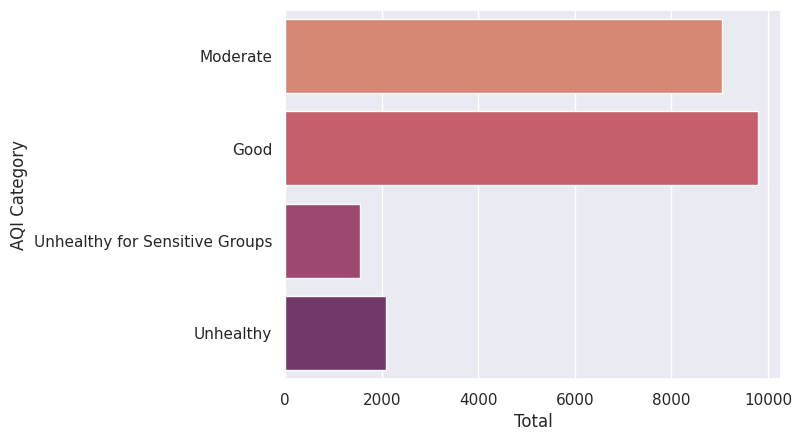

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="AQI Category", data=data, palette="flare")
plt.ylabel('AQI Category')
plt.xlabel('Total')
plt.show()

У нас определенно есть дисбаланс классов, попробуем сначала обучить просто модели, а потом используем технику [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#smote)

In [ ]:
X=data.drop('AQI Category',axis=1)
y=data['AQI Category']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=RANDOM_SEED)

Словарь\список для сохранения данных

In [ ]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

In [ ]:
from sklearn.metrics import classification_report

# Standard Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
DTC = accuracy_score(y_pred_dt,y_test)

# Decision Tree with Gini Impurity
dt_clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_clf_gini.fit(X_train, y_train)
y_pred_dt_gini = dt_clf_gini.predict(X_test)
DTC_gini = accuracy_score(y_pred_dt_gini,y_test)

# Decision Tree with Information Gain (Entropy)
dt_clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf_entropy.fit(X_train, y_train)
y_pred_dt_entropy = dt_clf_entropy.predict(X_test)
DTC_entropy = accuracy_score(y_pred_dt_entropy,y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Standard Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
RF_clf = accuracy_score(y_pred_rf,y_test)


In [ ]:
from sklearn.svm import SVC

# Standard SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
SVM_clf = accuracy_score(y_pred_svm_linear,y_test)

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
SVM_rbf = accuracy_score(y_pred_svm_rbf,y_test)

# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', C=1, degree=3)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
SVM_poly = accuracy_score(y_pred_svm_poly,y_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Standard k-NN with k=3 and Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_knn_euclidean = knn_euclidean.predict(X_test)
KNN_euclidean = accuracy_score(y_pred_knn_euclidean,y_test)

# k-NN with k=3 and Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_knn_manhattan = knn_manhattan.predict(X_test)
KNN_manhattan = accuracy_score(y_pred_knn_manhattan,y_test)

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression',
                                  'Standard Decision Tree','Decision Tree with Gini Impurity',
                                  'Decision Tree with Information Gain (Entropy)',
                                  'Standard Random Forest','Standard SVM with Linear Kernel',
                                  'SVM with RBF Kernel','SVM with Polynomial Kernel',
                                  'k-NN with k=3 and Euclidean distance', 'k-NN with k=3 and Manhattan distance'],
                        'Accuracy': [LRAcc*100,
                                     DTC*100,DTC_gini*100,DTC_entropy*100,
                                     RF_clf*100, SVM_clf*100,SVM_rbf*100,SVM_poly*100,
                                     KNN_euclidean*100, KNN_manhattan*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,100.000000
1,Standard Decision Tree,100.000000
2,Decision Tree with Gini Impurity,100.000000
3,Decision Tree with Information Gain (Entropy),100.000000
5,Standard SVM with Linear Kernel,100.000000
4,Standard Random Forest,99.985159
9,k-NN with k=3 and Manhattan distance,99.050163
7,SVM with Polynomial Kernel,98.070644
8,k-NN with k=3 and Euclidean distance,97.803503
6,SVM with RBF Kernel,52.849510


Интересно как измениться результат после работы с дисбалансом классов.

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

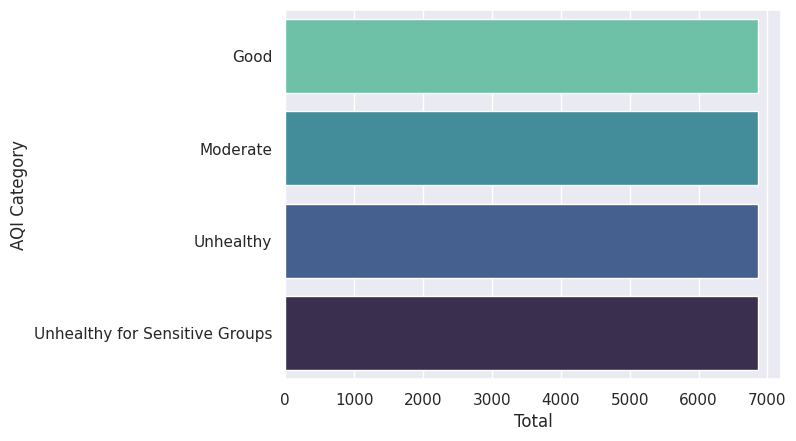

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=data, palette="mako_r")
plt.ylabel('AQI Category')
plt.xlabel('Total')
plt.show()

In [ ]:
LRclassifier2 = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier2.fit(X_train, y_train)
y_pred2 = LRclassifier2.predict(X_test)
LRAcc2 = accuracy_score(y_pred2,y_test)

# Standard Decision Tree
dt_clf2 = DecisionTreeClassifier(random_state=42)
dt_clf2.fit(X_train, y_train)
y_pred_dt2 = dt_clf2.predict(X_test)
DTC2 = accuracy_score(y_pred_dt2,y_test)

# Decision Tree with Gini Impurity
dt_clf_gini2 = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_clf_gini2.fit(X_train, y_train)
y_pred_dt_gini2 = dt_clf_gini2.predict(X_test)
DTC_gini2 = accuracy_score(y_pred_dt_gini2,y_test)

# Decision Tree with Information Gain (Entropy)
dt_clf_entropy2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf_entropy2.fit(X_train, y_train)
y_pred_dt_entropy2 = dt_clf_entropy2.predict(X_test)
DTC_entropy2 = accuracy_score(y_pred_dt_entropy2,y_test)

# Standard Random Forest
rf_clf2 = RandomForestClassifier(random_state=42, n_estimators=10)
rf_clf2.fit(X_train, y_train)
y_pred_rf2 = rf_clf2.predict(X_test)
RF_clf2 = accuracy_score(y_pred_rf2,y_test)

# Standard SVM with Linear Kernel
svm_linear2 = SVC(kernel='linear', C=1)
svm_linear2.fit(X_train, y_train)
y_pred_svm_linear2 = svm_linear2.predict(X_test)
SVM_clf2 = accuracy_score(y_pred_svm_linear2,y_test)

# SVM with RBF Kernel
svm_rbf2 = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf2.fit(X_train, y_train)
y_pred_svm_rbf2 = svm_rbf2.predict(X_test)
SVM_rbf2 = accuracy_score(y_pred_svm_rbf2,y_test)

# SVM with Polynomial Kernel
svm_poly2 = SVC(kernel='poly', C=1, degree=3)
svm_poly2.fit(X_train, y_train)
y_pred_svm_poly2 = svm_poly2.predict(X_test)
SVM_poly2 = accuracy_score(y_pred_svm_poly2,y_test)

# Standard k-NN with k=3 and Euclidean distance
knn_euclidean2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean2.fit(X_train, y_train)
y_pred_knn_euclidean2 = knn_euclidean2.predict(X_test)
KNN_euclidean2 = accuracy_score(y_pred_knn_euclidean2,y_test)

# k-NN with k=3 and Manhattan distance
knn_manhattan2 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan2.fit(X_train, y_train)
y_pred_knn_manhattan2 = knn_manhattan2.predict(X_test)
KNN_manhattan2 = accuracy_score(y_pred_knn_manhattan2,y_test)

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression',
                                  'Standard Decision Tree','Decision Tree with Gini Impurity',
                                  'Decision Tree with Information Gain (Entropy)',
                                  'Standard Random Forest','Standard SVM with Linear Kernel',
                                  'SVM with RBF Kernel','SVM with Polynomial Kernel',
                                  'k-NN with k=3 and Euclidean distance', 'k-NN with k=3 and Manhattan distance'],
                        'Accuracy': [LRAcc*100,
                                     DTC*100,DTC_gini*100,DTC_entropy*100,
                                     RF_clf*100, SVM_clf*100,SVM_rbf*100,SVM_poly*100,
                                     KNN_euclidean*100, KNN_manhattan*100],
                        'Balanced Classes Accuracy': [LRAcc2*100,
                                     DTC2*100,DTC_gini2*100,DTC_entropy2*100,
                                     RF_clf2*100, SVM_clf2*100,SVM_rbf2*100,SVM_poly2*100,
                                     KNN_euclidean2*100, KNN_manhattan2*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Balanced Classes Accuracy
0,Logistic Regression,100.000000,100.000000
1,Standard Decision Tree,100.000000,100.000000
2,Decision Tree with Gini Impurity,100.000000,100.000000
3,Decision Tree with Information Gain (Entropy),100.000000,100.000000
5,Standard SVM with Linear Kernel,100.000000,100.000000
4,Standard Random Forest,99.985159,99.985159
9,k-NN with k=3 and Manhattan distance,99.050163,98.916592
7,SVM with Polynomial Kernel,98.070644,96.794301
8,k-NN with k=3 and Euclidean distance,97.803503,97.744138
6,SVM with RBF Kernel,52.849510,66.681508


По факту баланс классов улучшил только качество SVM с RBF (значительно улучшил), для остальных изменения близки к нулю или сотые.

Сохраним модель - лог.рег.

<Figure size 2000x800 with 0 Axes>

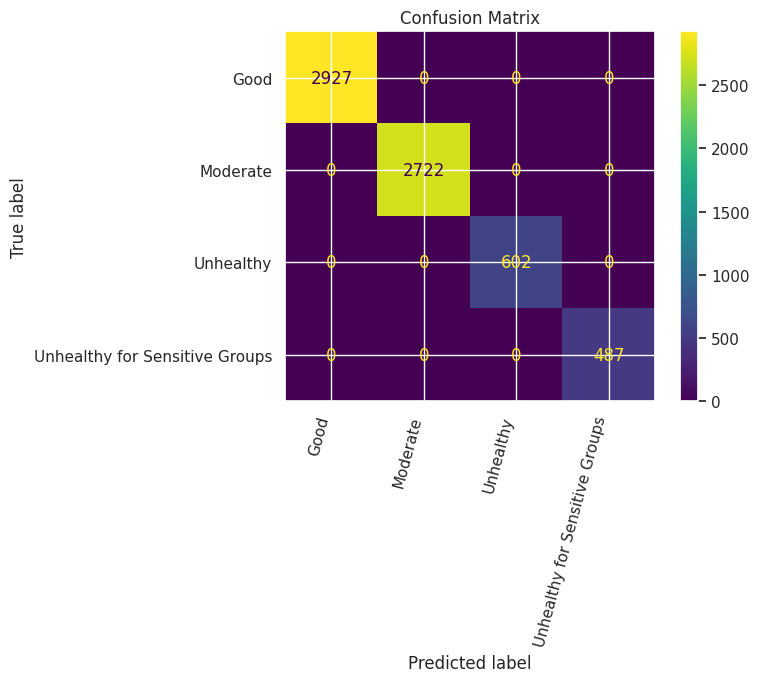

In [ ]:
def plotConfusionMatrix(preds,classes):

    #make confusion matrix display
    cm=confusion_matrix(y_test,preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
    fig =plt.figure(figsize=(20,8))
    disp.plot()
    plt.xticks(rotation = 75, ha = 'right')
    plt.title('Confusion Matrix')


pipeline = Pipeline([
    ('classifier', LogisticRegression(solver='liblinear', max_iter=5000))
    ])

pipeline.fit(X_train,y_train)
preds = pipeline.predict(X_test)

plotConfusionMatrix(preds,pipeline.classes_)





In [ ]:
import pickle
import gzip
pkl_filename = "pickle_model.pkl"

with gzip.open(pkl_filename, 'wb') as f:
    pickle.dump(pipeline, f)